## Business Case:- : Predict H1N1 and Seasonal Flu Vaccines

* Can you predict whether people got H1N1 and seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviors? In this challenge, we will take a look at vaccination, a key public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity."

* As of the launch of this competition, vaccines for the COVID-19 virus are still under development and not yet available. The competition will instead revisit the public health response to a different recent major respiratory disease pandemic. Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world. Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.
A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

* In this InClass competition, we will look at vaccination, a vital public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and a well-immunized community can further reduce the spread of diseases through "herd immunity."


#### Domian Name :- Healthcare and Public Health Sector

## Problem description :-

* Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: one for h1n1_vaccine and one for seasonal_vaccine. Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey.


## Domain Analysis

* Domain analysis is the process of studying and understanding a specific field or area to identify common concepts, requirements, and patterns. It involves gathering knowledge about the domain, analyzing its key components, and defining reusable models or frameworks that can be applied to similar problems. This helps in improving efficiency, consistency, and decision-making when developing solutions within that domain.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data1 = pd.read_csv("features.csv")
data1

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  ...             income_poverty  marital_status  \
0                        1.0  ...              Below Poverty     Not Married   
1                        1.0  ...              Below Poverty     Not Married   
2                        0.0  ...  <= $75,000, Above Poverty     Not Married   
3                        0.0  ...              Below Poverty     Not Married   
4                        1.0  ...  <= $75,000, Above Poverty         Married   
...                      ...  ...                        ...             ...   
26702                    0.0  ...  <= $75,000, Above Poverty     Not Married   
26703                    0.0  ...  <= $75,000, Above Poverty     Not Married   
26704                    1.0  ...                        NaN     Not Married   
26705                    NaN  ...  <= $75,000, Above Poverty         Married   
26706                    0.0  ...  <= $75,000, Above Poverty         Married   

       rent_or_own   employment_status  hhs_geo_region  \
0              Own  Not in Labor Force        oxchjgsf   
1             Rent            Employed        bhuqouqj   
2              Own            Employed        qufhixun   
3             Rent  Not in Labor Force        lrircsnp   
4              Own            Employed        qufhixun   
...            ...                 ...             ... 

In [3]:
data2 = pd.read_csv("labels.csv")
data2

respondent_id  h1n1_vaccine  seasonal_vaccine
0                  0             0                 0
1                  1             0                 1
2                  2             0                 0
3                  3             0                 1
4                  4             0                 0
...              ...           ...               ...
26702          26702             0                 0
26703          26703             0                 0
26704          26704             0                 1
26705          26705             0                 0
26706          26706             0                 0

[26707 rows x 3 columns]

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
data = data1.merge(data2,on="respondent_id")
data

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                        1.0               0.0                   0.0   
1                        1.0               0.0                   0.0   
2                        0.0               NaN                   NaN   
3                        0.0               0.0                   1.0   
4                        1.0               0.0                   0.0   
...                      ...               ...                   ...   
26702                    0.0               0.0                   0.0   
26703                    0.0               1.0                   1.0   
26704                    1.0               0.0                   0.0   
26705                    NaN               0.0                   0.0   
26706                    0.0               0.0                   0.0   

       chronic_med_condition  child_under_6_months  health_worker  \
0                        0.0                   0.0            0.0   
1                        0.0                   0.0            0.0   
2                        1.0                   0.0            0.0   
3                        1.0                   0.0            0.0   
4                        0.0                   0.0            0.0   
...                      ...                   ...            ...   
26702           

## Basic Check

* A basic check refers to an initial evaluation or validation process to ensure data quality, correctness, and consistency before further analysis or processing. This can include checking for missing values, duplicate entries, incorrect data types, or anomalies in the dataset. In machine learning, basic checks help identify potential issues that may impact model performance, such as class imbalances, feature distributions, or correlations. Performing these checks early in the pipeline ensures a solid foundation for accurate and reliable analysis or predictions.

In [6]:
data.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               NaN                   NaN   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               NaN                          3.0                1.0   
3               NaN                          3.0                3.0   
4               NaN                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own         

In [7]:
data.tail()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
26702                    0.0               0.0                   0.0   
26703                    0.0               1.0                   1.0   
26704                    1.0               0.0                   0.0   
26705                    NaN               0.0                   0.0   
26706                    0.0               0.0                   0.0   

       chronic_med_condition  child_under_6_months  health_worker  \
26702                    0.0                   0.0            0.0   
26703                    0.0                   0.0            1.0   
26704                    0.0                   0.0            0.0   
26705                    0.0                   0.0            0.0   
26706                    0.0                   0.0            0.0   

       health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
26702               NaN                          3.0                1.0   
26703               1.0                          4.0                2.0   
26704               NaN                          4.0                4.0   
26705               0.0                          3.0                1.0   
26706               1.0                          5.0                1.0   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
26702                          1.0                          5.0   
26703                          2.0                          5.0   
26704                          2.0                          5.0   
26705                          2.0                          2.0   
26706                          1.0                          5.0   

       opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
26702                2.0                          2.0      65+ Years   
26703                1.0                          1.0  18 - 34 Years   
26704                4.0                          2.0  55 - 64 Years   
26705                1.0                          2.0  18 - 34 Years   
26706                1.0                          1.0      65+ Years   

              education      race     sex             income_poverty  \
26702      Some College     White  Female  <= $75,000, Above Poverty   
26703  College Graduate     White    Male  <= $75,000, Above Poverty   
26704      Some College     White  Female                        NaN   
26705      Some College  Hispanic  Female  <= $75,000, Above Poverty   
26706      Some College     White    Male  <= $75,000, Above Poverty   

      marital_status rent_or_own   employment_status hhs_geo_region  \
26702    Not Married         Own  Not in Labo

In [8]:
data.describe()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26615.000000    26591.000000               26636.000000   
mean    13353.000000      1.618486        1.262532                   0.048844   
std      7709.791156      0.910311        0.618149                   0.215545   
min         0.000000      0.000000        0.000000                   0.000000   
25%      6676.500000      1.000000        1.000000                   0.000000   
50%     13353.000000      2.000000        1.000000                   0.000000   
75%     20029.500000      2.000000        2.000000                   0.000000   
max     26706.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
count           26579.000000      24547.000000          24547.000000   
mean                0.677264          0.220312              0.329735   
std                 0.467531          0.414466              0.470126   
min                 0.000000          0.000000              0.000000   
25%                 0.000000          0.000000              0.000000   
50%                 1.000000          0.000000              0.000000   
75%                 1.000000          0.000000              1.000000   
max                 1.000000          1.000000              1.000000   

       chronic_med_condition  child_under_6_months  health_worker  \
count           25736.000000          25887.000000   25903.000000   
mean                0.283261              0.082590       0.111918   
std                 0.450591              0.275266       0.315271   
min                 0.000000              0.000000       0.000000   
25%                 0.000000              0.000000       0.000000   
50%                 0.000000              0.000000       0.000000   
75%                 1.000000              0.000000       0.000000   
max                 1.000000              1.000000       1.000000   

       health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count       14433.00000                 26316.000000       26319.000000   
mean            0.87972                     3.850623           2.342566   
std             0.32530                     1.007436           1.285539   
min             0.00000                     1.000000           1.000000   
25%             1.00000                     3.000000           1.000000   
50%             1.00000                     4.000000           2.000000   
75%             1.00000                     5.000000           4.000000   
max             1.00000                     5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count     

In [9]:
data.describe(include="O")

age_group         education   race     sex             income_poverty  \
count       26707             25300  26707   26707                      22284   
unique          5                 4      4       2                          3   
top     65+ Years  College Graduate  White  Female  <= $75,000, Above Poverty   
freq         6843             10097  21222   15858                      12777   

       marital_status rent_or_own employment_status hhs_geo_region  \
count           25299       24665             25244          26707   
unique              2           2                 3             10   
top           Married         Own          Employed       lzgpxyit   
freq            13555       18736             13560           4297   

                      census_msa employment_industry employment_occupation  
count                      26707               13377                 13237  
unique                         3                  21                    23  
top     MSA, Not Principle  City            fcxhlnwr              xtkaffoo  
freq                       11645                2468                  1778

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

## EDA:- Exploratory Data Analysis

* Exploratory Data Analysis (EDA) is the process of analyzing and summarizing datasets to understand their structure, patterns, and relationships before applying machine learning models. It involves visualizing data through graphs, histograms, and box plots to detect trends, outliers, and missing values. EDA also includes statistical techniques such as correlation analysis, distribution checks, and feature selection to gain insights and improve data preprocessing. By performing EDA, data scientists can make informed decisions about data cleaning, feature engineering, and model selection, ultimately leading to better predictions and interpretations.

#### 1. Univariant Analysis

* Univariate analysis is the statistical examination of a single variable to understand its distribution, central tendency, and variability. It helps in identifying patterns, outliers, and underlying data characteristics using measures such as mean, median, mode, variance, and standard deviation. Visualization techniques like histograms, box plots, and density plots are commonly used to analyze the spread and shape of the data. This type of analysis is crucial for understanding individual features before moving to more complex analyses involving multiple variables.

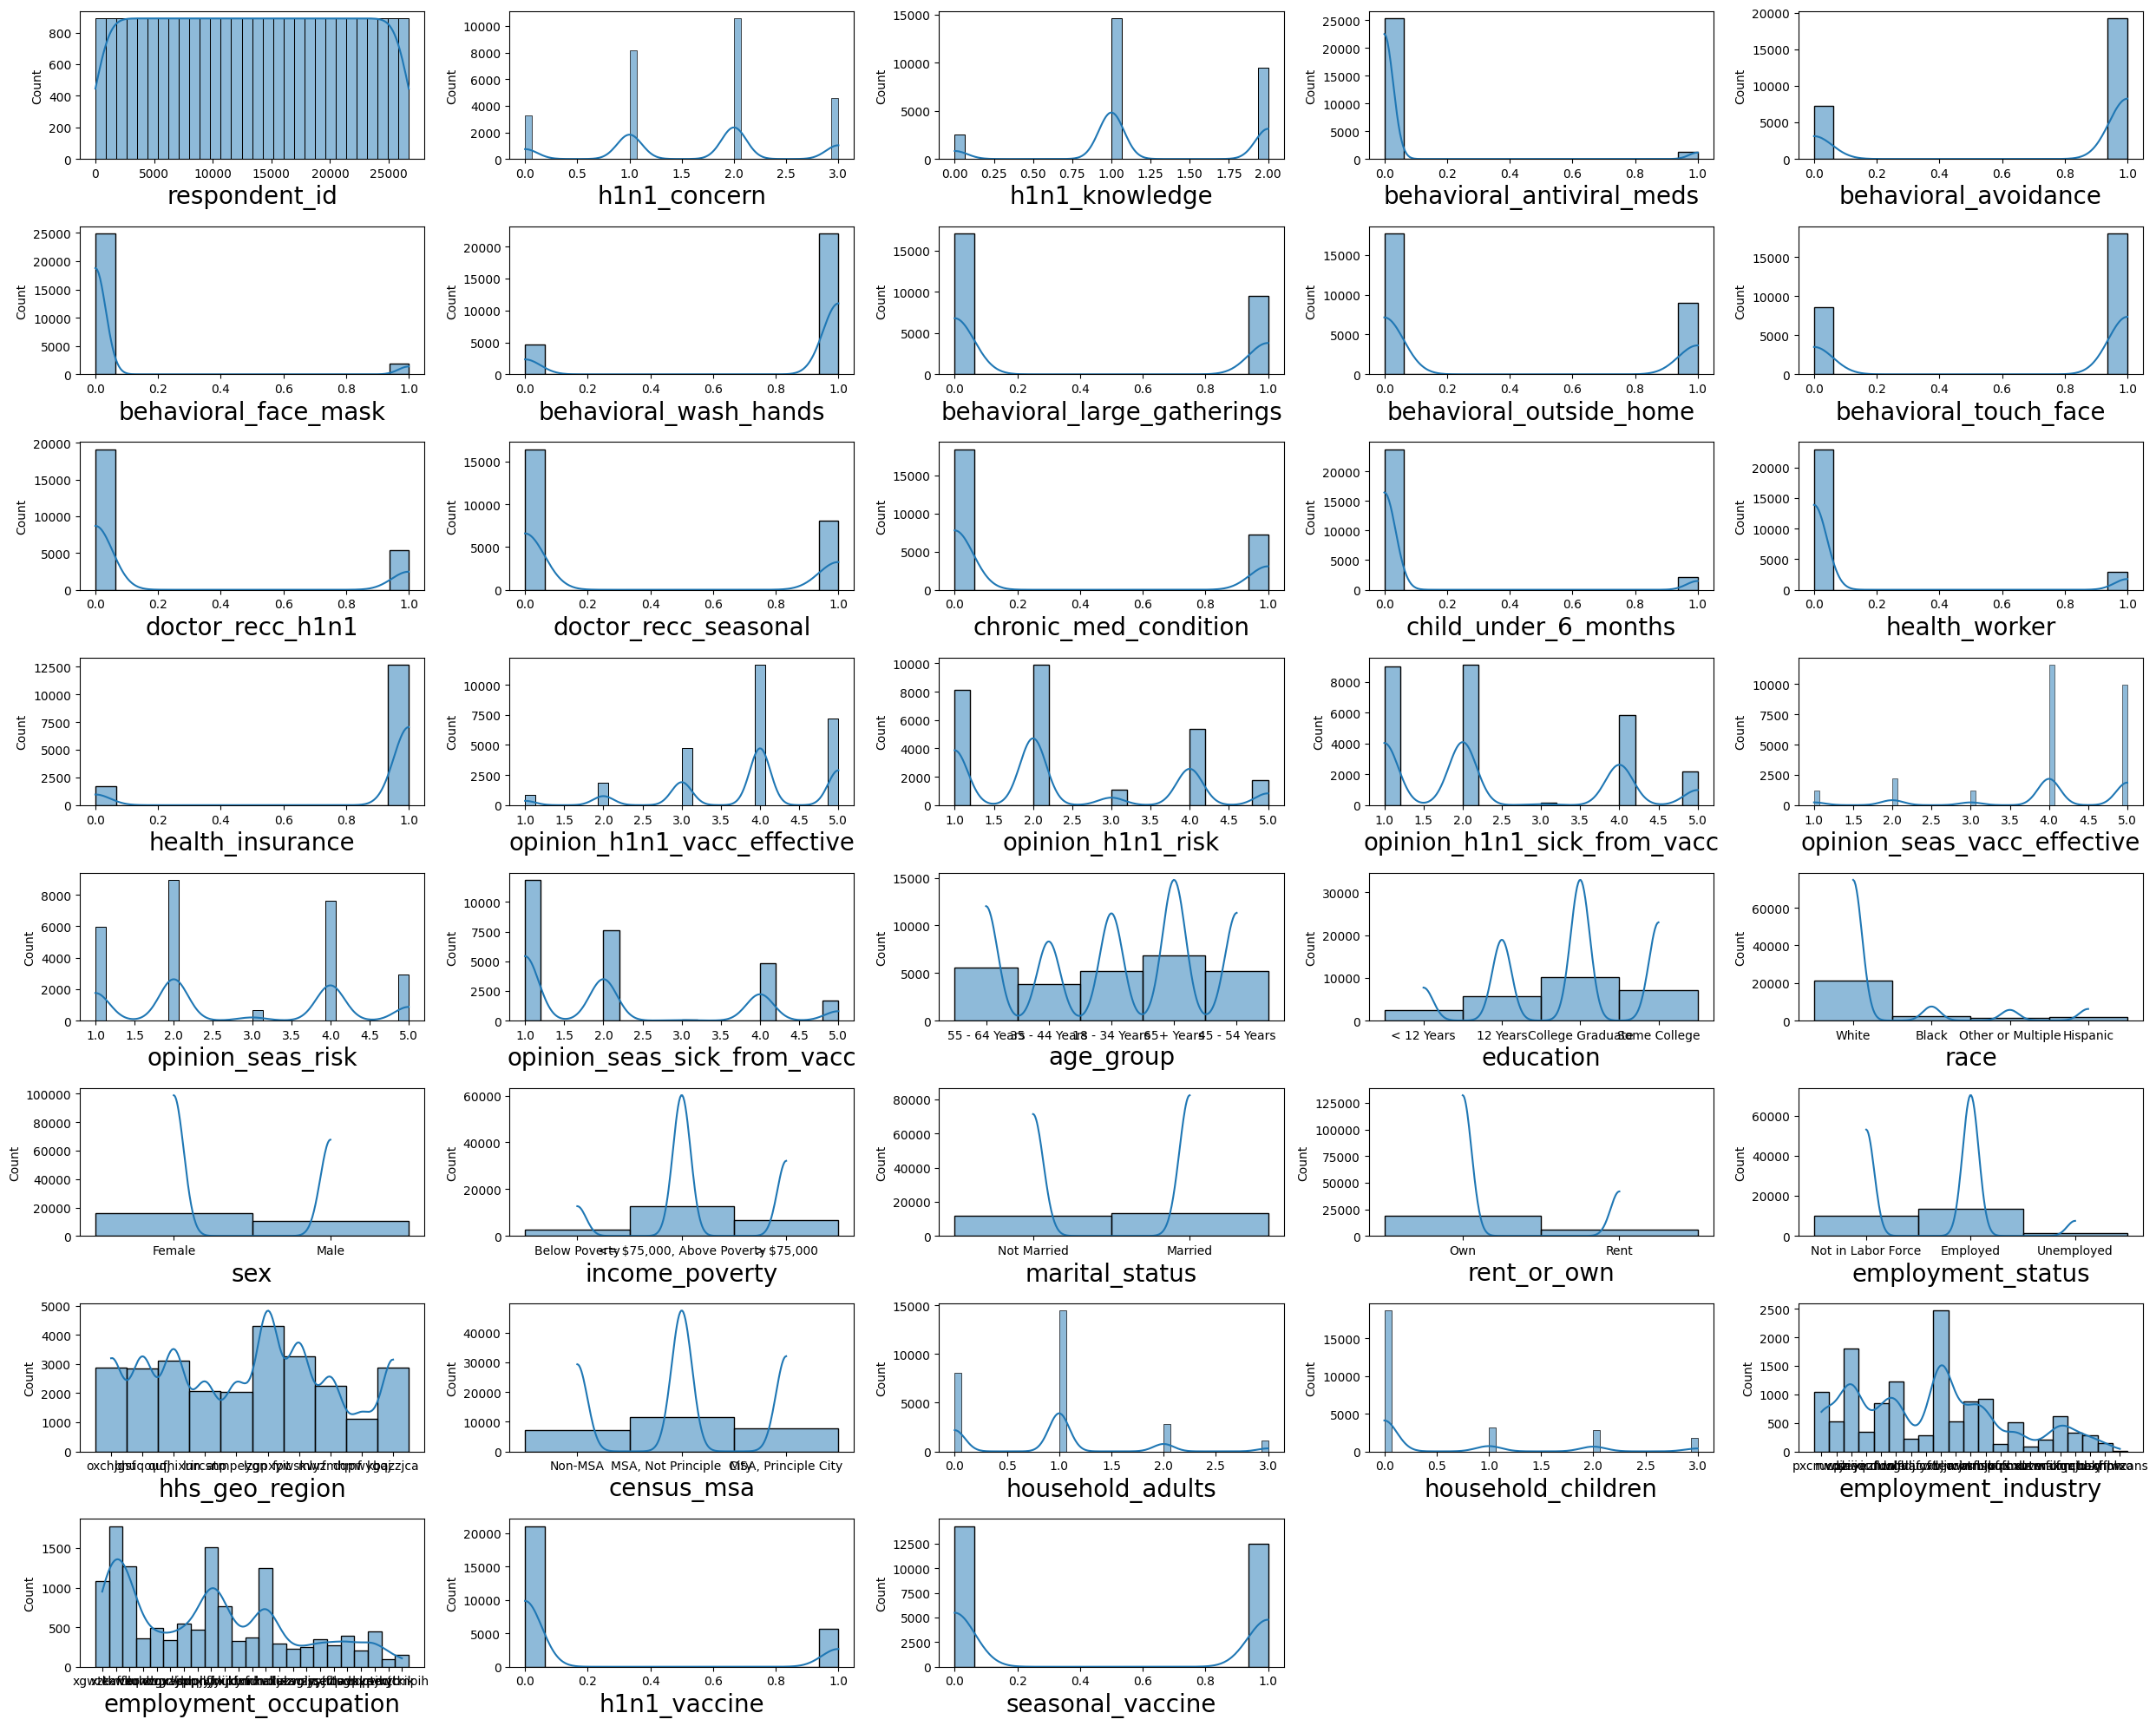

In [11]:
plt.figure(figsize=(25,20))
plt_num = 1
for column in data:
    if plt_num <= 38:
        plt.subplot(8,5,plt_num)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize = 20)
    plt_num += 1
plt.tight_layout()

**Insights:-**
* Here we can seen that any columns does not follow normal distributions.

#### 2. Baivariant Analysis

* Bivariate analysis is the statistical examination of the relationship between two variables to determine their correlation and dependency. It helps in understanding how one variable influences or interacts with another. Common techniques include scatter plots for visualizing relationships, correlation coefficients (such as Pearson or Spearman) for measuring the strength and direction of association, and cross-tabulation for categorical data analysis. This analysis is useful for identifying trends, patterns, and potential predictive relationships between variables in a dataset.

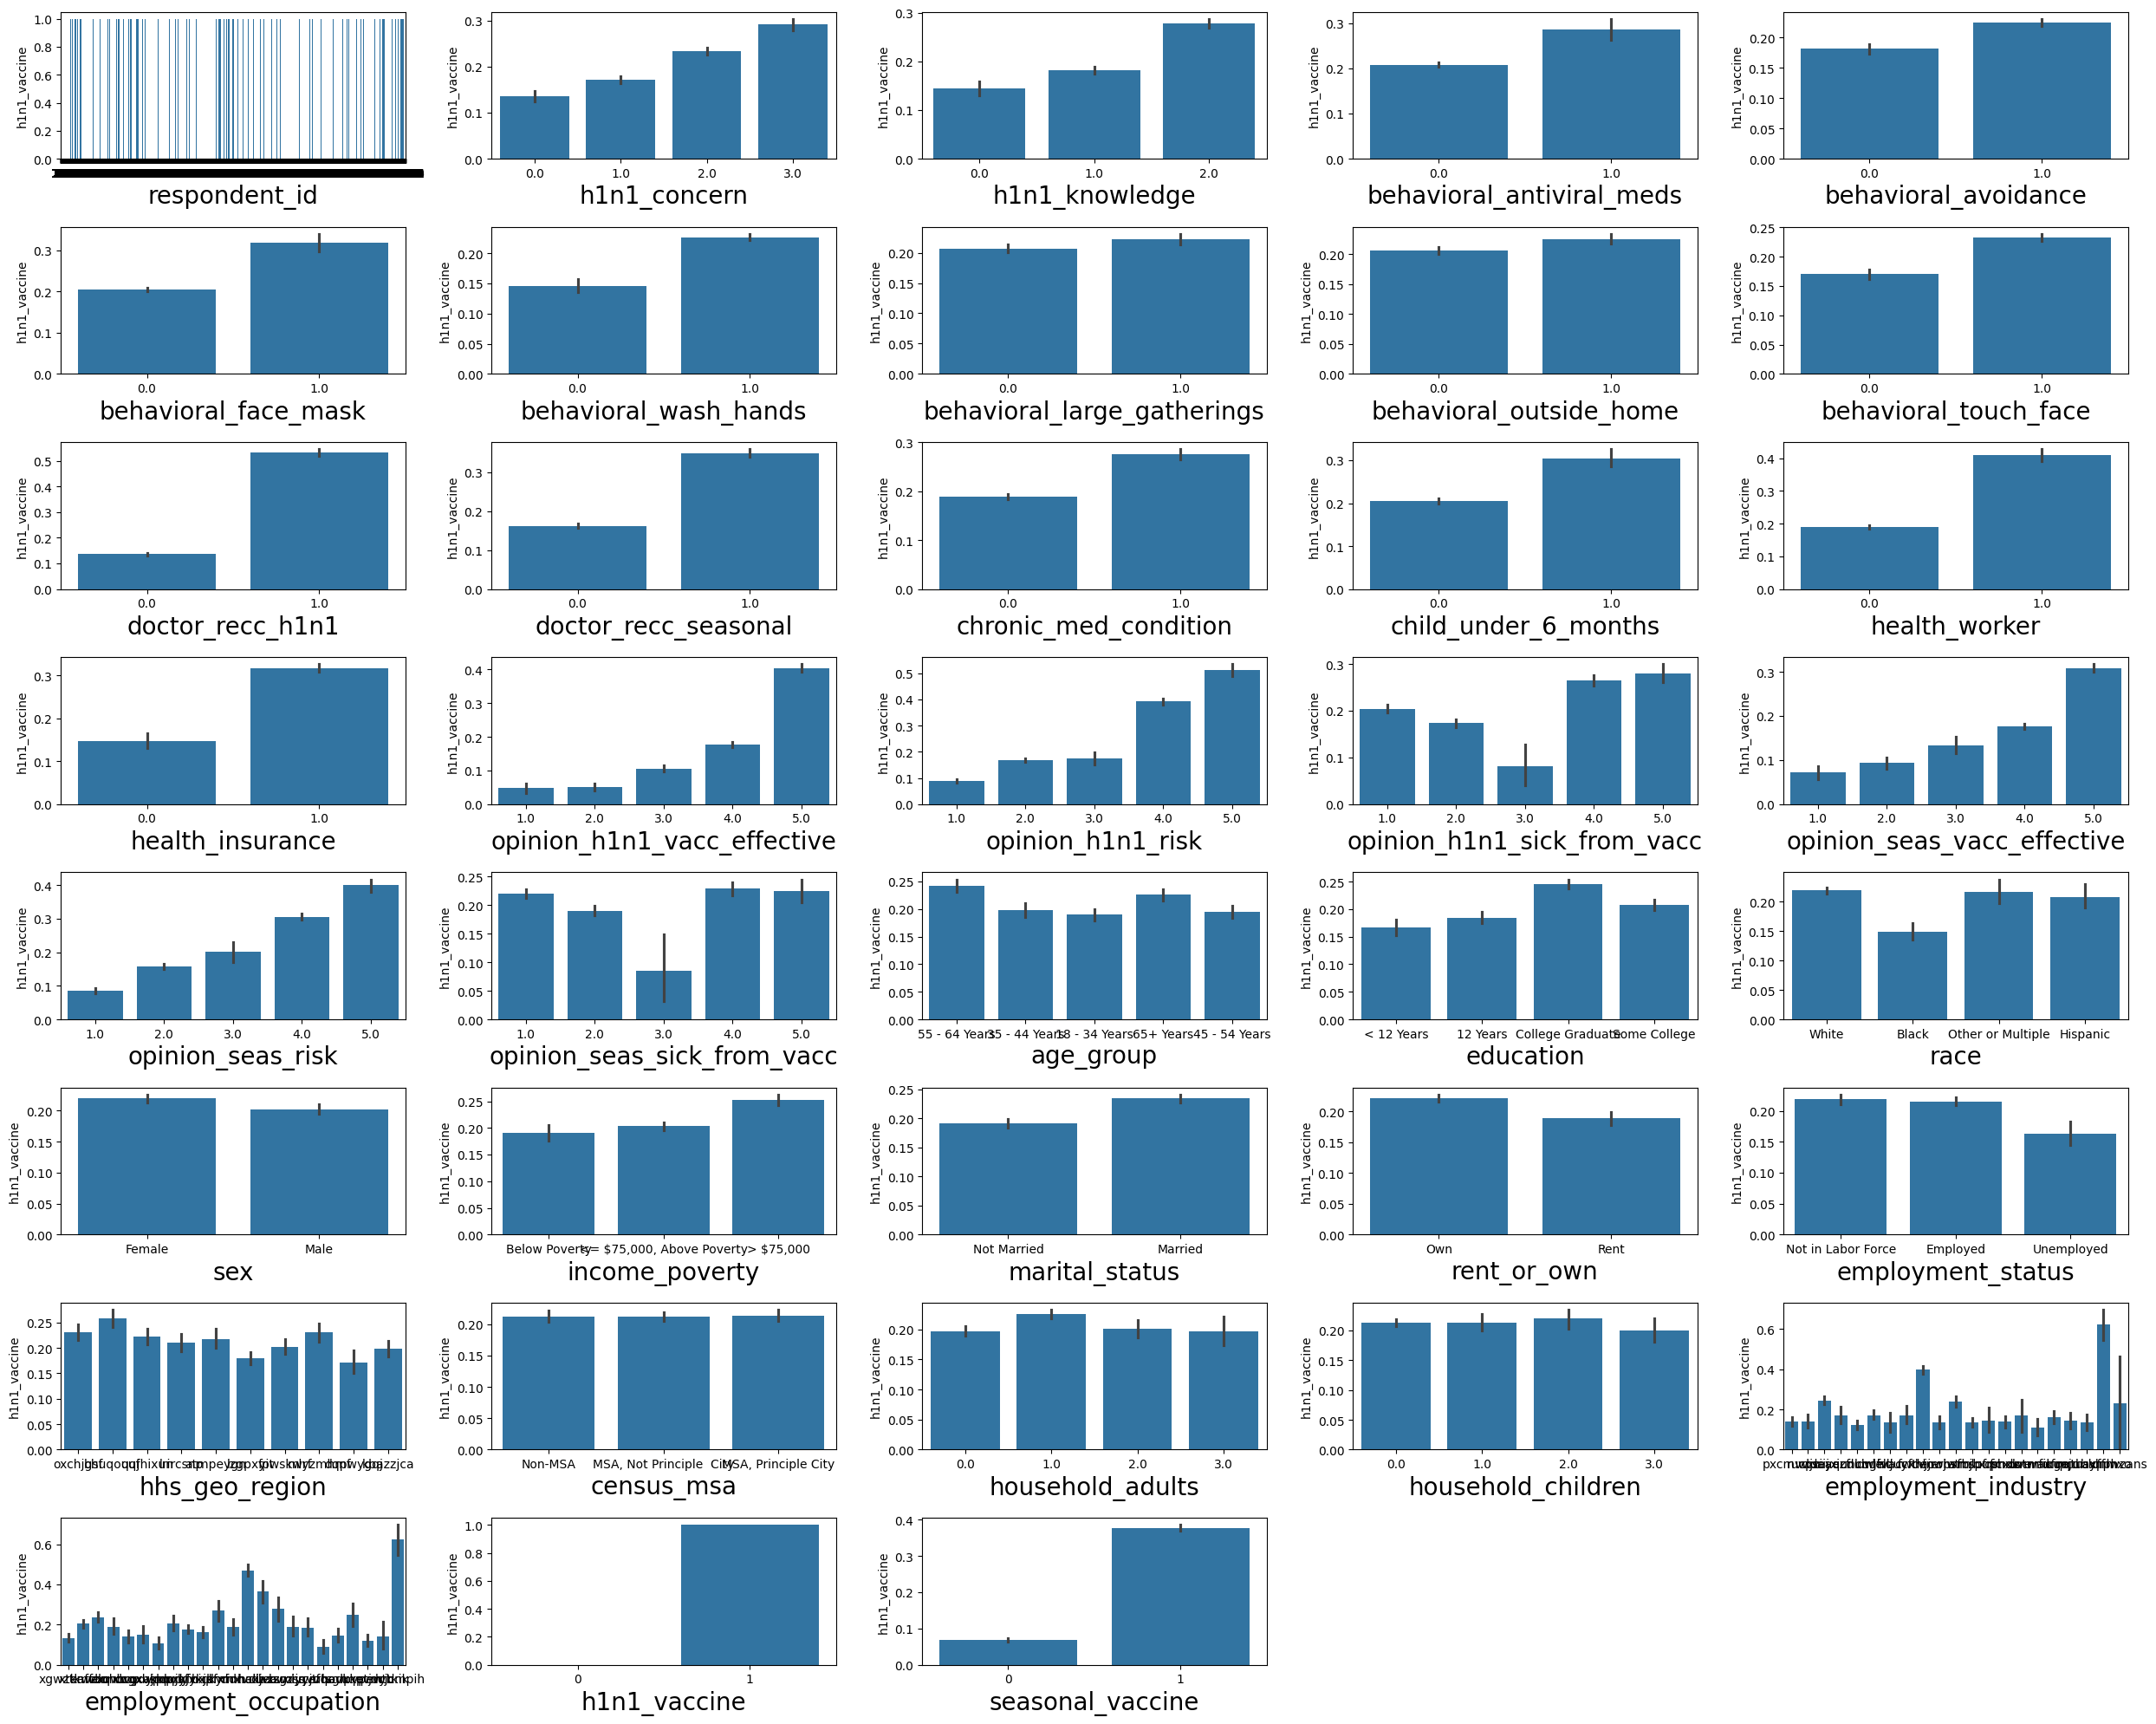

In [12]:
plt.figure(figsize=(25,20))
plt_num = 1
for column in data:
    if plt_num <= 38:
        plt.subplot(8,5,plt_num)
        sns.barplot(x = data[column],y = data["h1n1_vaccine"])
        plt.xlabel(column,fontsize = 20)
    plt_num += 1
plt.tight_layout()

**Insights:-**
* H1N1 concern is significantly high compared to H1N1 vaccine uptake.
* A large number of people lack knowledge about the H1N1 vaccine.
* Behavioral use of antiviral medications is high among those considering the H1N1 vaccine.
* Behavioral avoidance measures are commonly observed in people considering the H1N1 vaccine.
* Many people purchase face masks as a precaution against H1N1.
* Handwashing frequency has increased due to H1N1 concerns.
* Many individuals prefer staying home to avoid exposure to H1N1.
* Face-touching habits contribute to the spread of H1N1.
* A significant number of people have health insurance.
* The age group 55-64 years has the highest representation.
* College dropout rates are noticeable in the dataset.
* Women are more represented in the data compared to men.
* Married individuals are in the majority.
* Non-labor workers form a significant portion of the dataset.

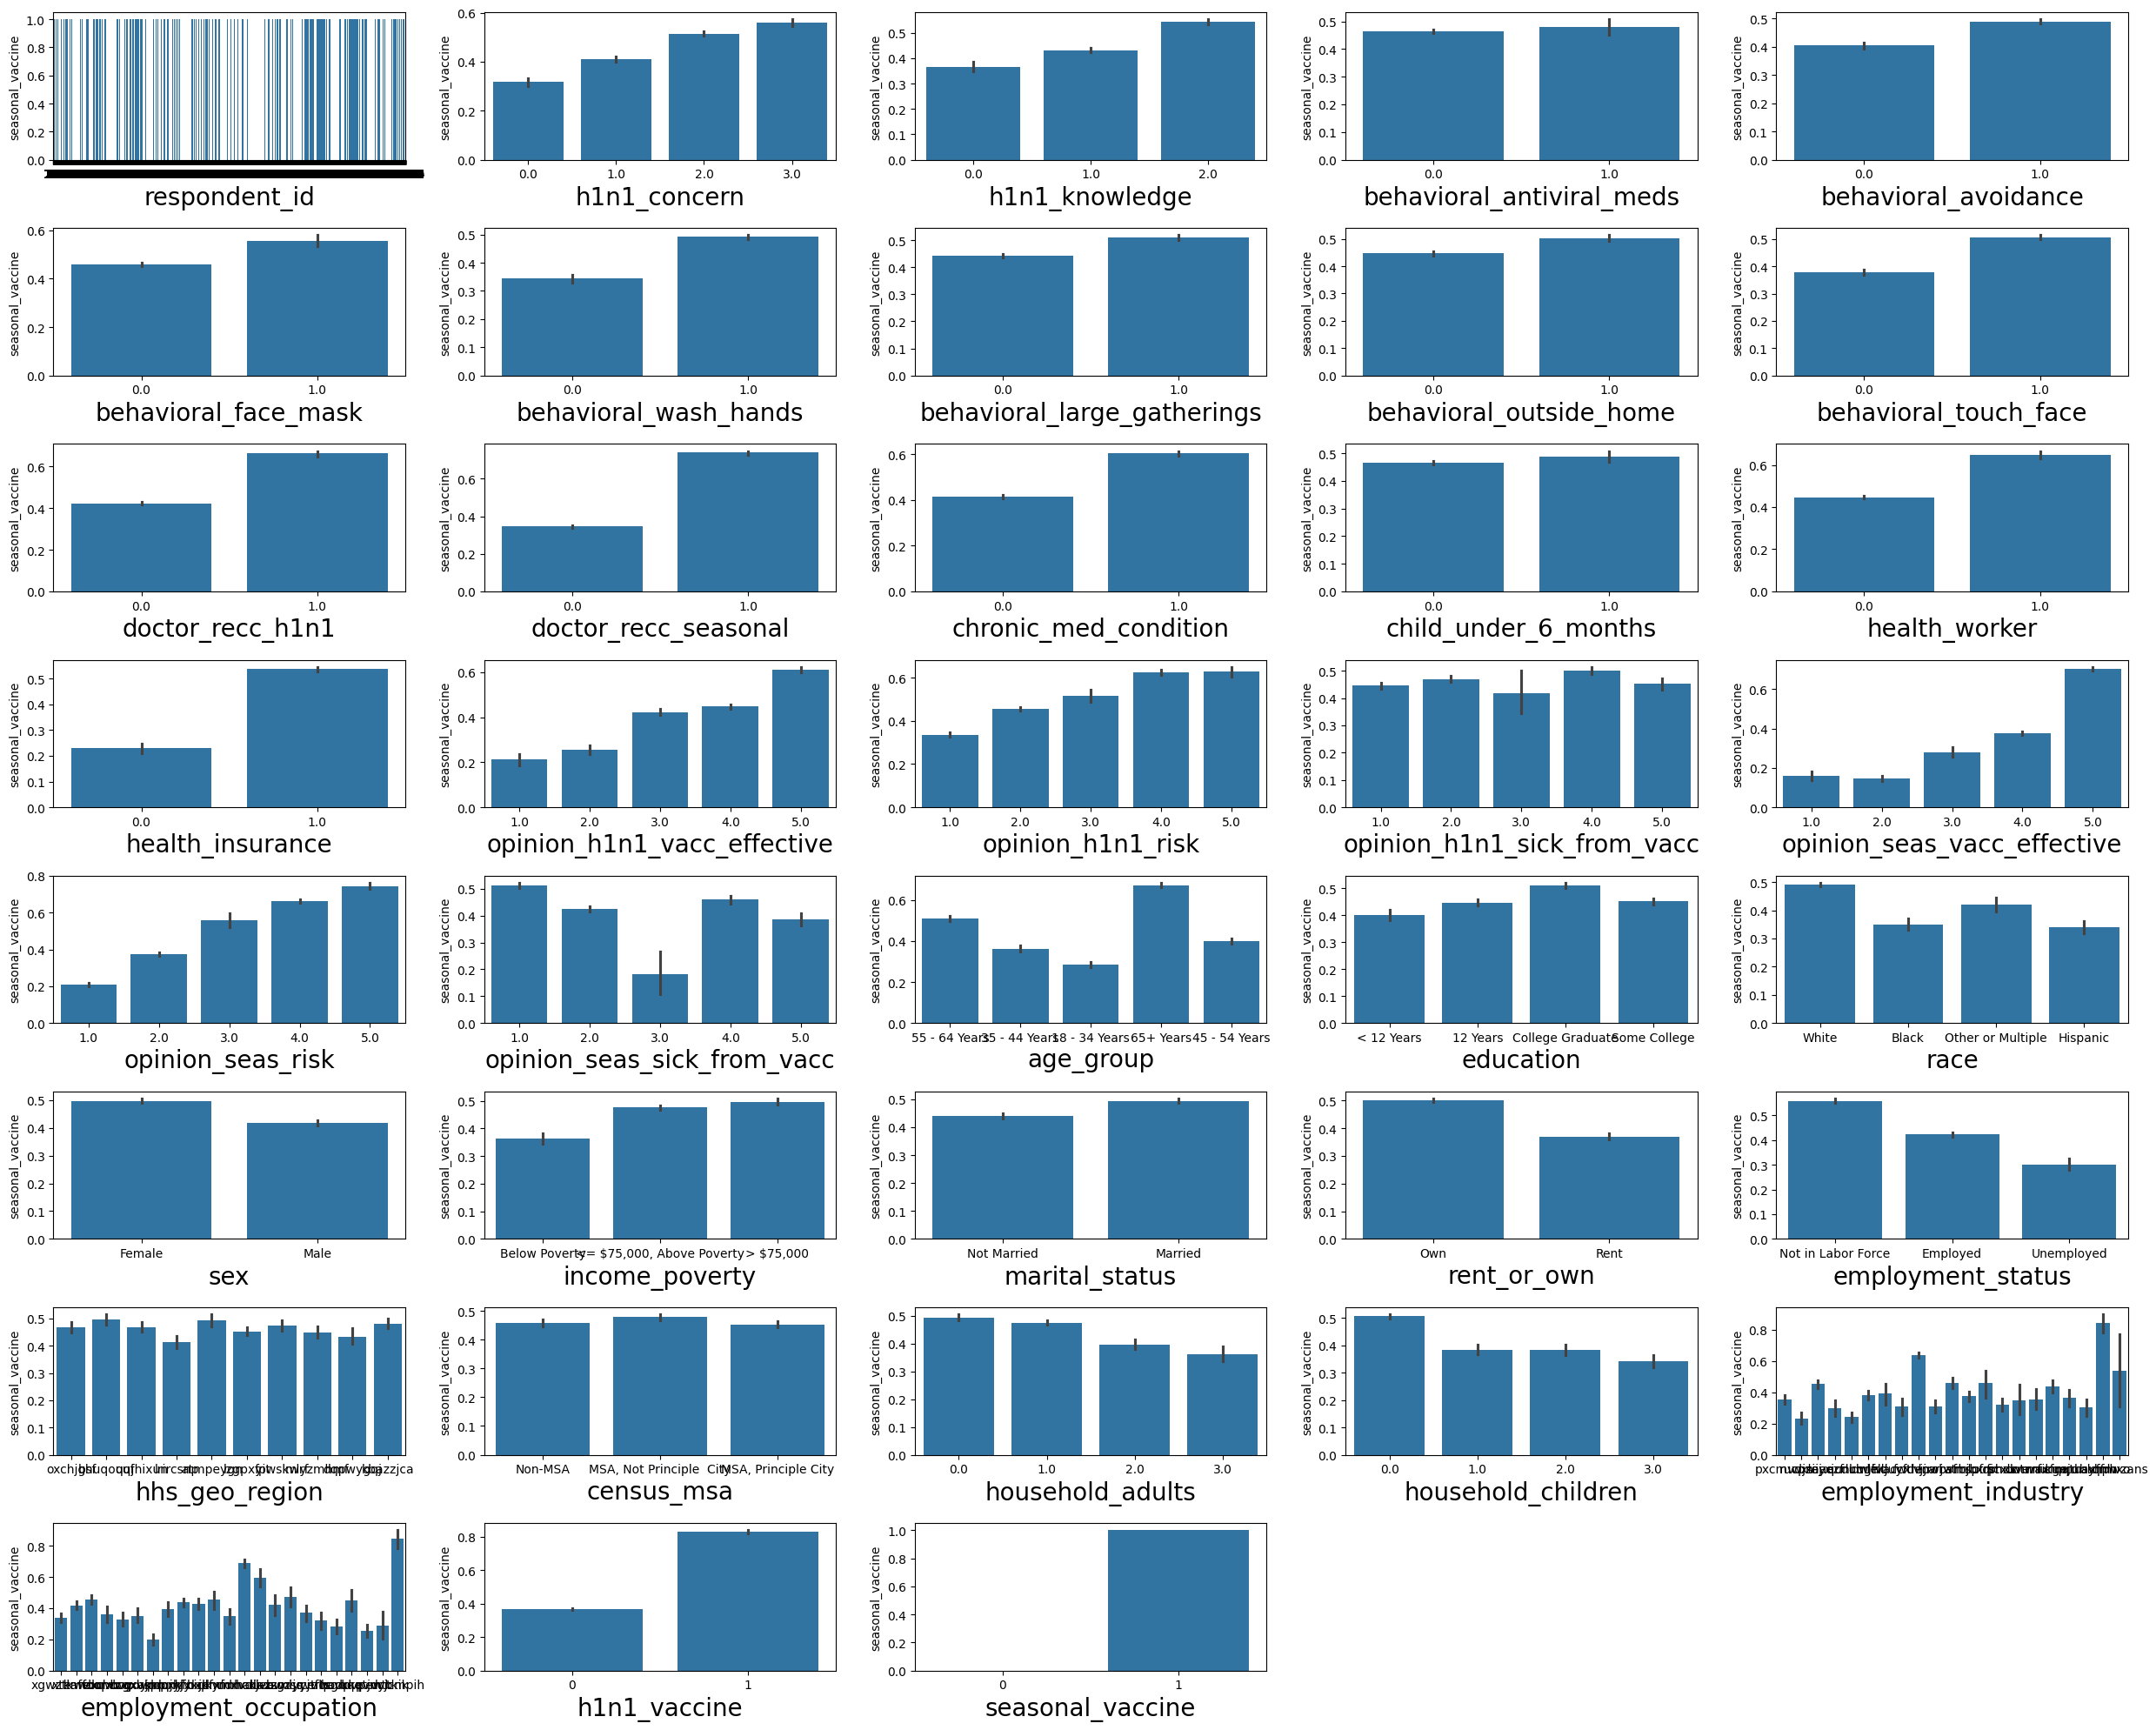

In [13]:
plt.figure(figsize=(25,20))
plt_num = 1
for column in data:
    if plt_num <= 38:
        plt.subplot(8,5,plt_num)
        sns.barplot(x = data[column],y = data["seasonal_vaccine"])
        plt.xlabel(column,fontsize = 20)
    plt_num += 1
plt.tight_layout()

**Insights:-**
* Concern about seasonal flu is high, but vaccine uptake varies.
* A large number of people lack knowledge about the seasonal flu vaccine.
* Behavioral use of antiviral medications is high among those considering the seasonal flu vaccine.
* Behavioral avoidance measures are commonly observed in people considering the seasonal flu vaccine.
* Many people purchase face masks as a precaution against seasonal flu.
* Frequent handwashing is a common practice among those concerned about seasonal flu.
* Many individuals prefer staying home to reduce exposure to seasonal flu.
* Face-touching habits contribute to the spread of seasonal flu.
* A significant number of people have health insurance, which may influence vaccine uptake.
* The age group 55-64 years has the highest representation.
* College dropout rates are noticeable in the dataset.
* Women are more likely to get vaccinated compared to men.
* Married individuals are in the majority.
* Non-labor workers form a significant portion of the dataset

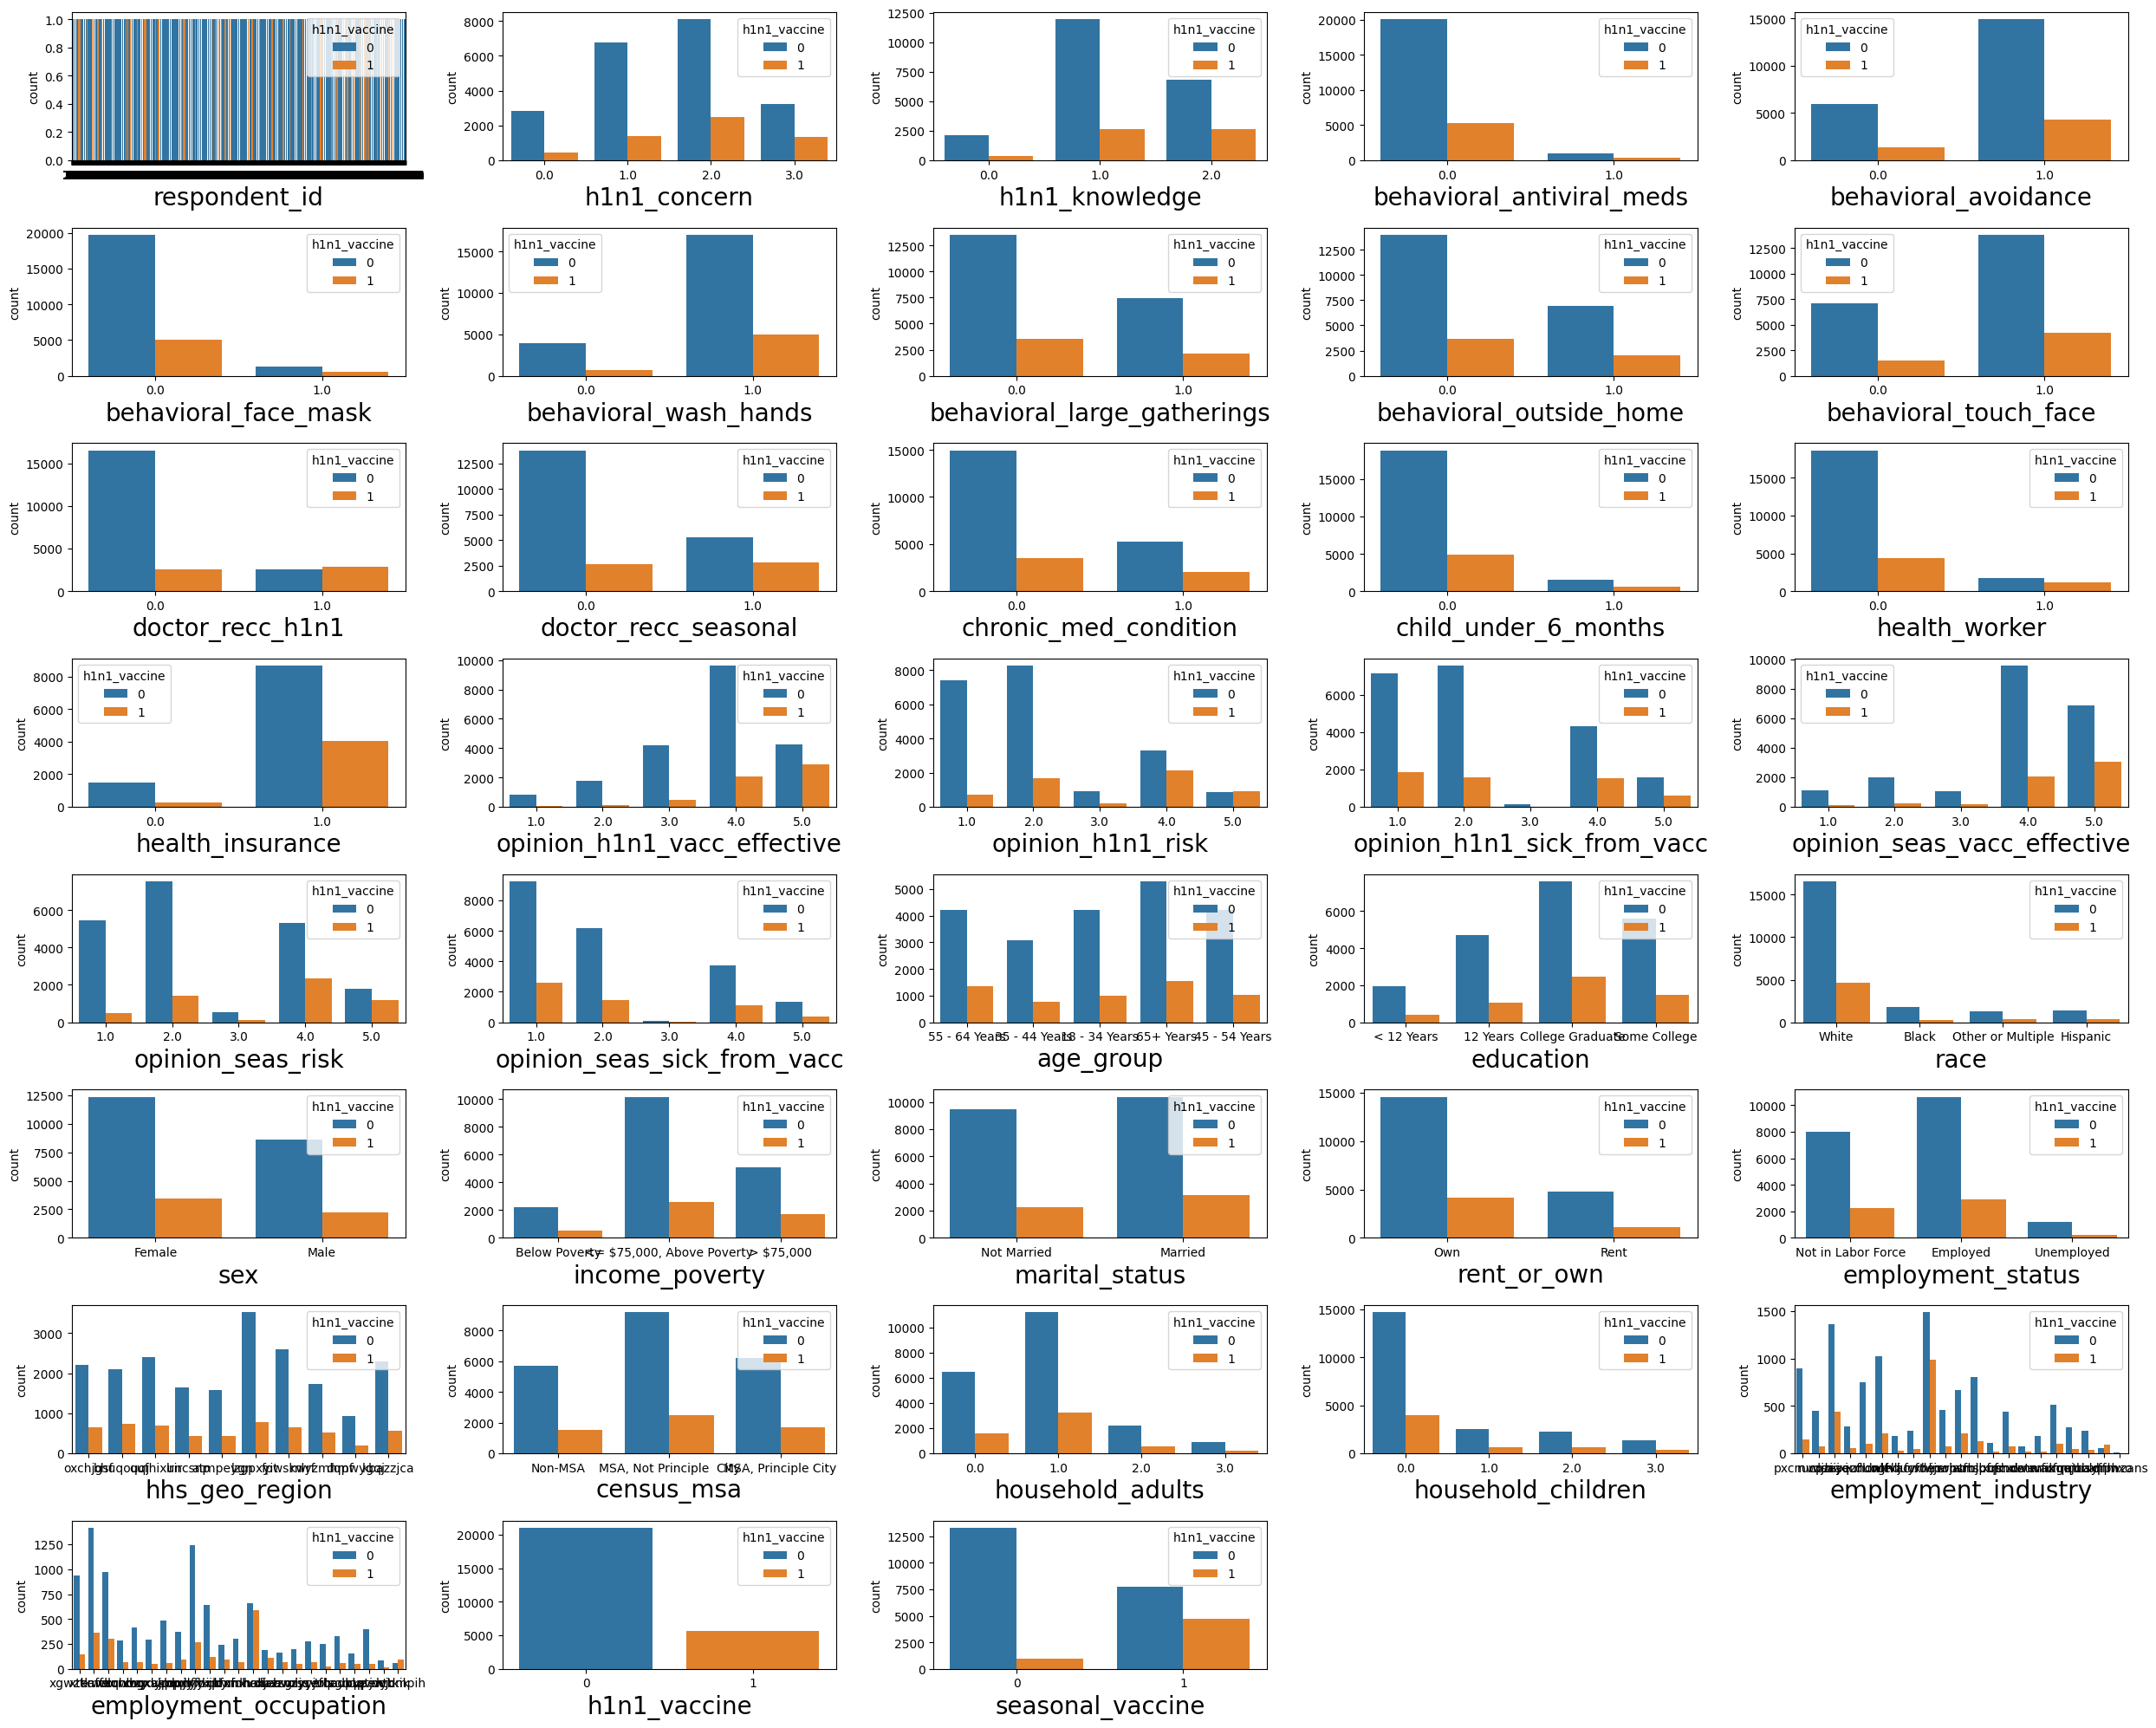

In [15]:
plt.figure(figsize=(25,20))
plt_num = 1
for column in data:
    if plt_num <= 38:
        plt.subplot(8,5,plt_num)
        sns.countplot(x = data[column],hue = data["h1n1_vaccine"])
        plt.xlabel(column,fontsize = 20)
    plt_num += 1
plt.tight_layout()

**Insights:-**
* Flu Concern & Awareness: Higher concern about seasonal flu correlates with increased vaccination rates.
* Lack of Knowledge: A significant number of individuals are unaware of the seasonal flu vaccine.
* Antiviral Medication Usage: People who take antiviral medications frequently are more likely to be vaccinated.
* Avoidance Behavior: Individuals who avoid crowded places tend to opt for vaccination.
* Face Mask Usage: Many vaccinated individuals also purchase face masks as a precaution.
* Handwashing Habit: Frequent handwashing is observed among those who receive the vaccine.
* Staying at Home: People who prefer staying at home are more inclined toward vaccination.
* Face Touching Risk: Individuals who frequently touch their face are at higher risk and may consider vaccination.
* Health Insurance Influence: Those with health insurance are more likely to get vaccinated.
* Age Factor: The 65-75 years age group has the highest vaccine uptake.
* Education Level: College dropout rates are noticeable among both vaccinated and non-vaccinated groups.
* Gender Disparity: Women show a higher vaccination rate compared to men.
* Marital Status: Married individuals have a higher likelihood of getting vaccinated.
* Employment Type: Employement form a significant portion of those who receive the vaccine

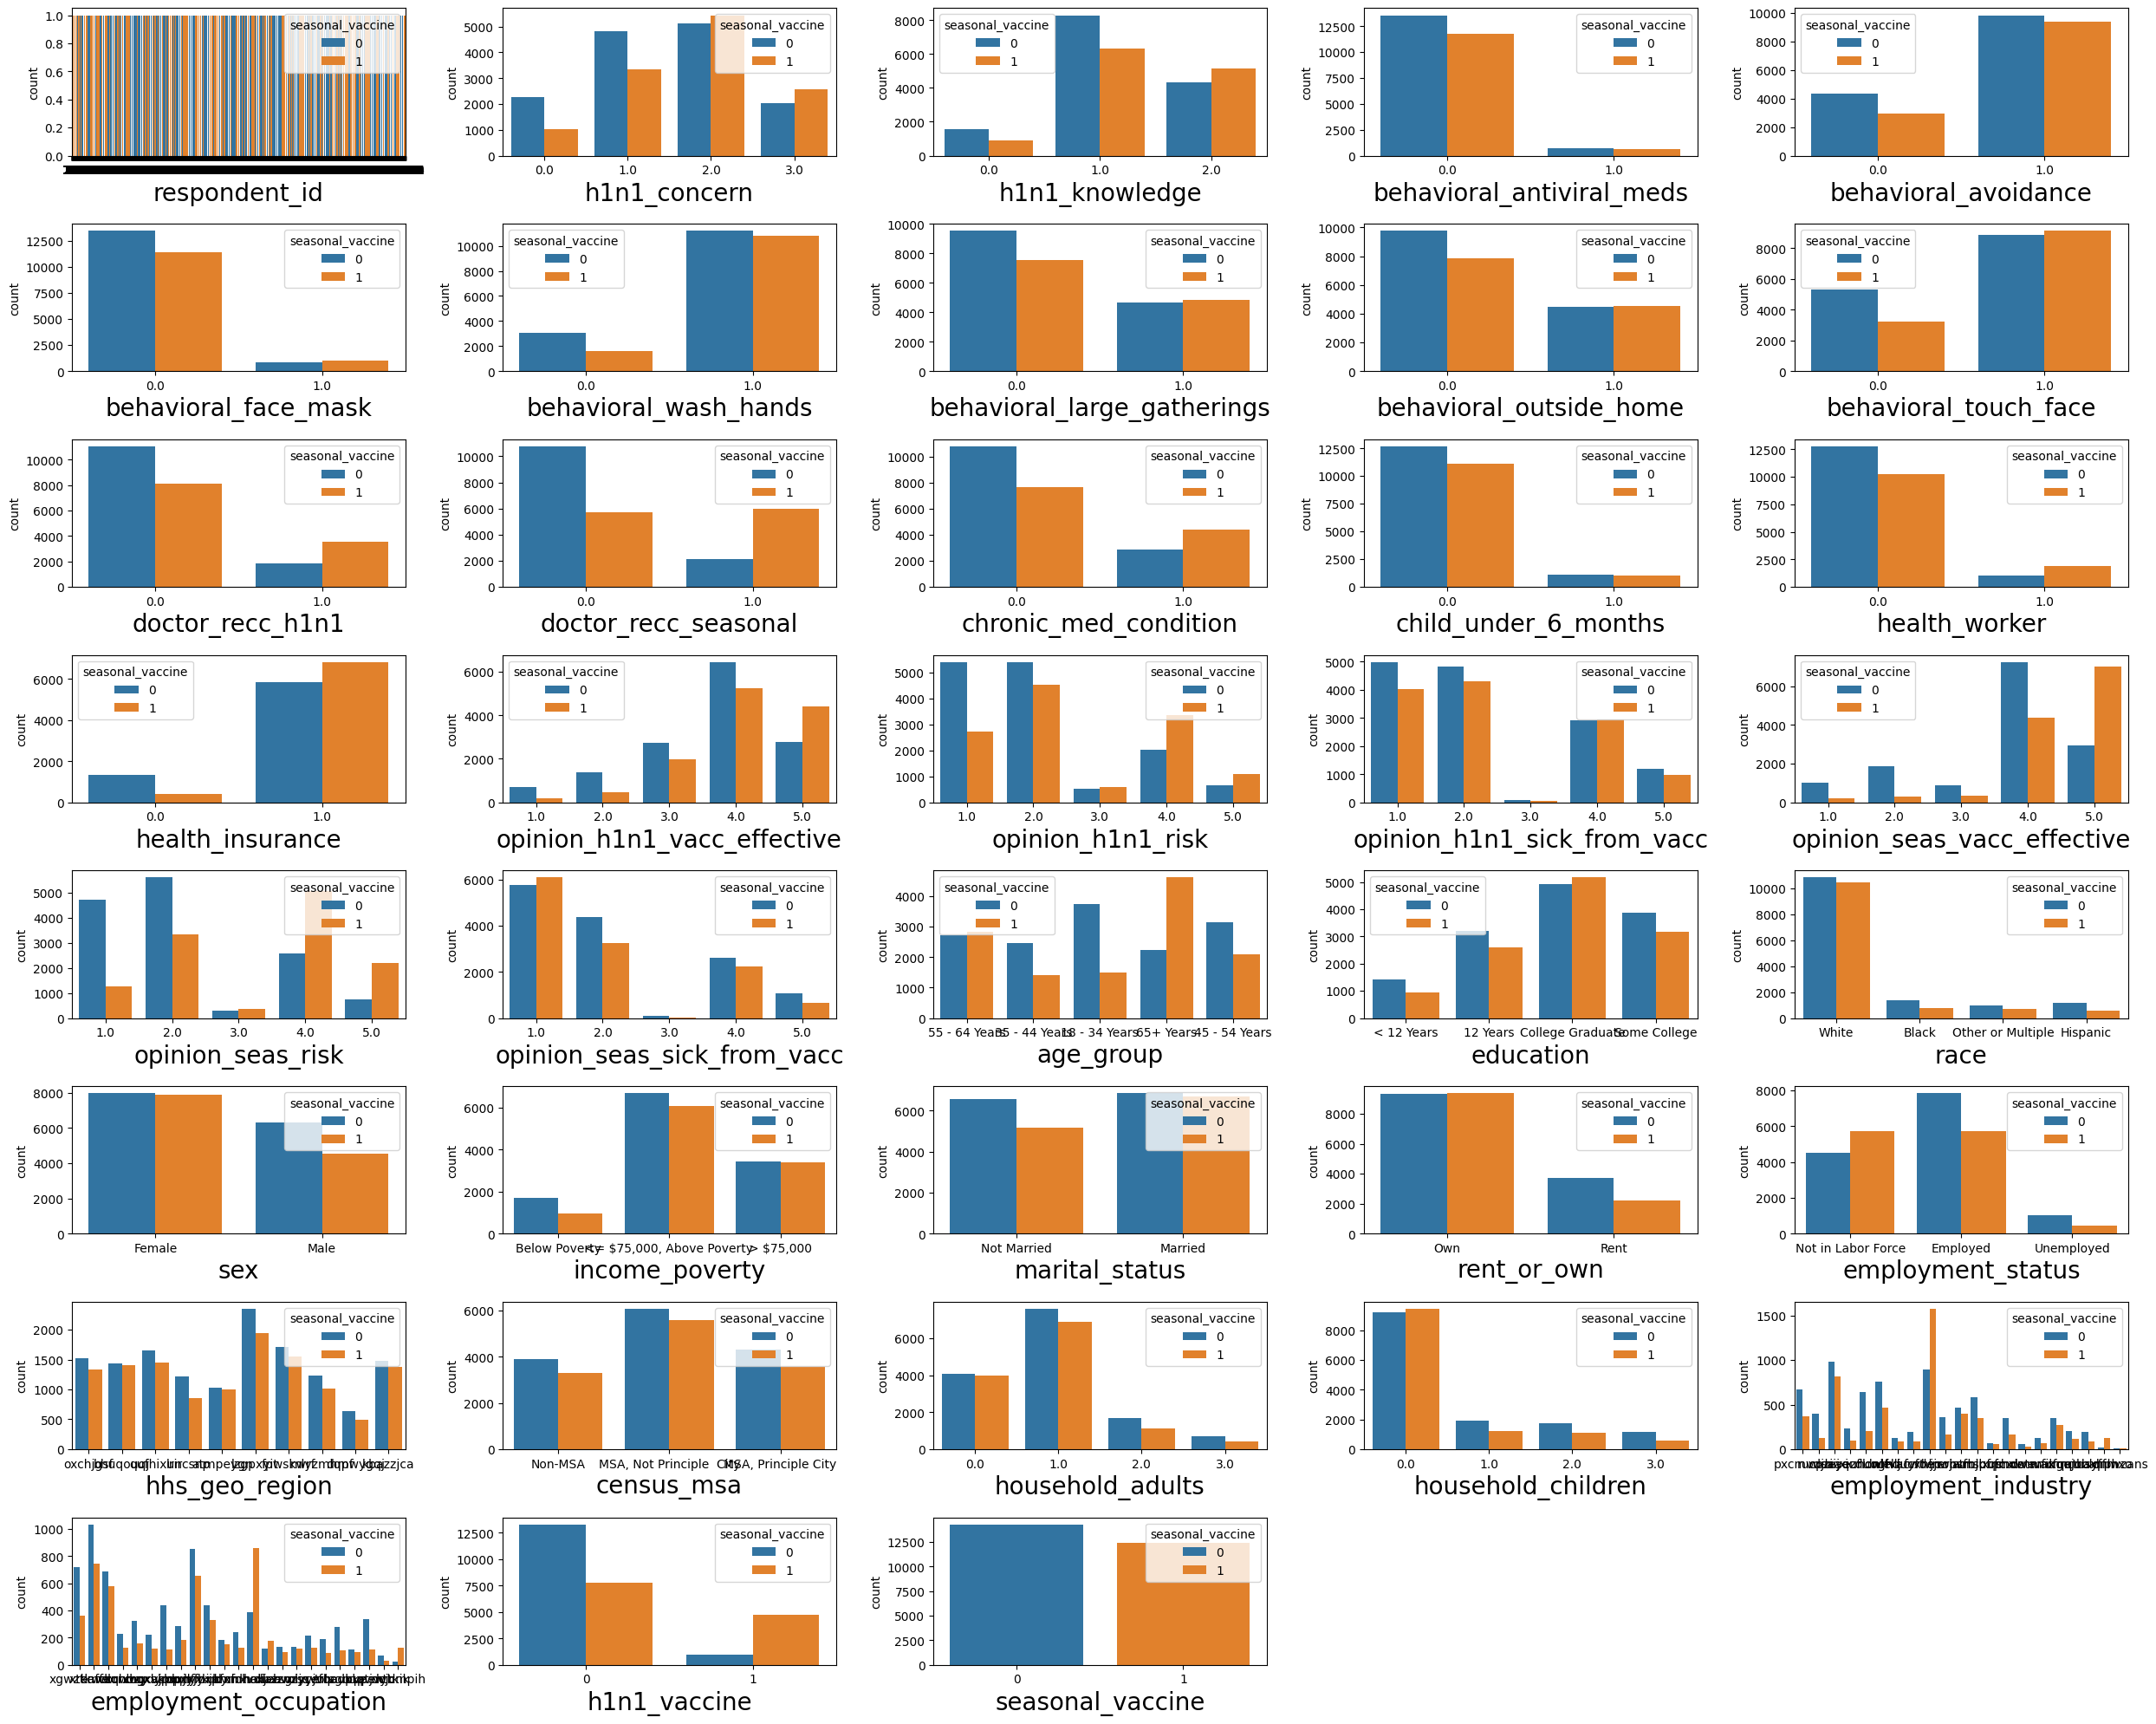

In [16]:
plt.figure(figsize=(25,20))
plt_num = 1
for column in data:
    if plt_num <= 38:
        plt.subplot(8,5,plt_num)
        sns.countplot(x = data[column],hue = data["seasonal_vaccine"])
        plt.xlabel(column,fontsize = 20)
    plt_num += 1
plt.tight_layout()

#### 3. Multivariant Analysis

* Multivariate analysis is the statistical examination of three or more variables simultaneously to understand complex relationships and interactions within a dataset. It helps in identifying patterns, dependencies, and hidden structures that may not be visible in univariate or bivariate analysis. Techniques such as multiple regression, principal component analysis (PCA), cluster analysis, and factor analysis are commonly used. This approach is essential in machine learning and data science for feature selection, dimensionality reduction, and improving model accuracy by considering multiple influencing factors together.

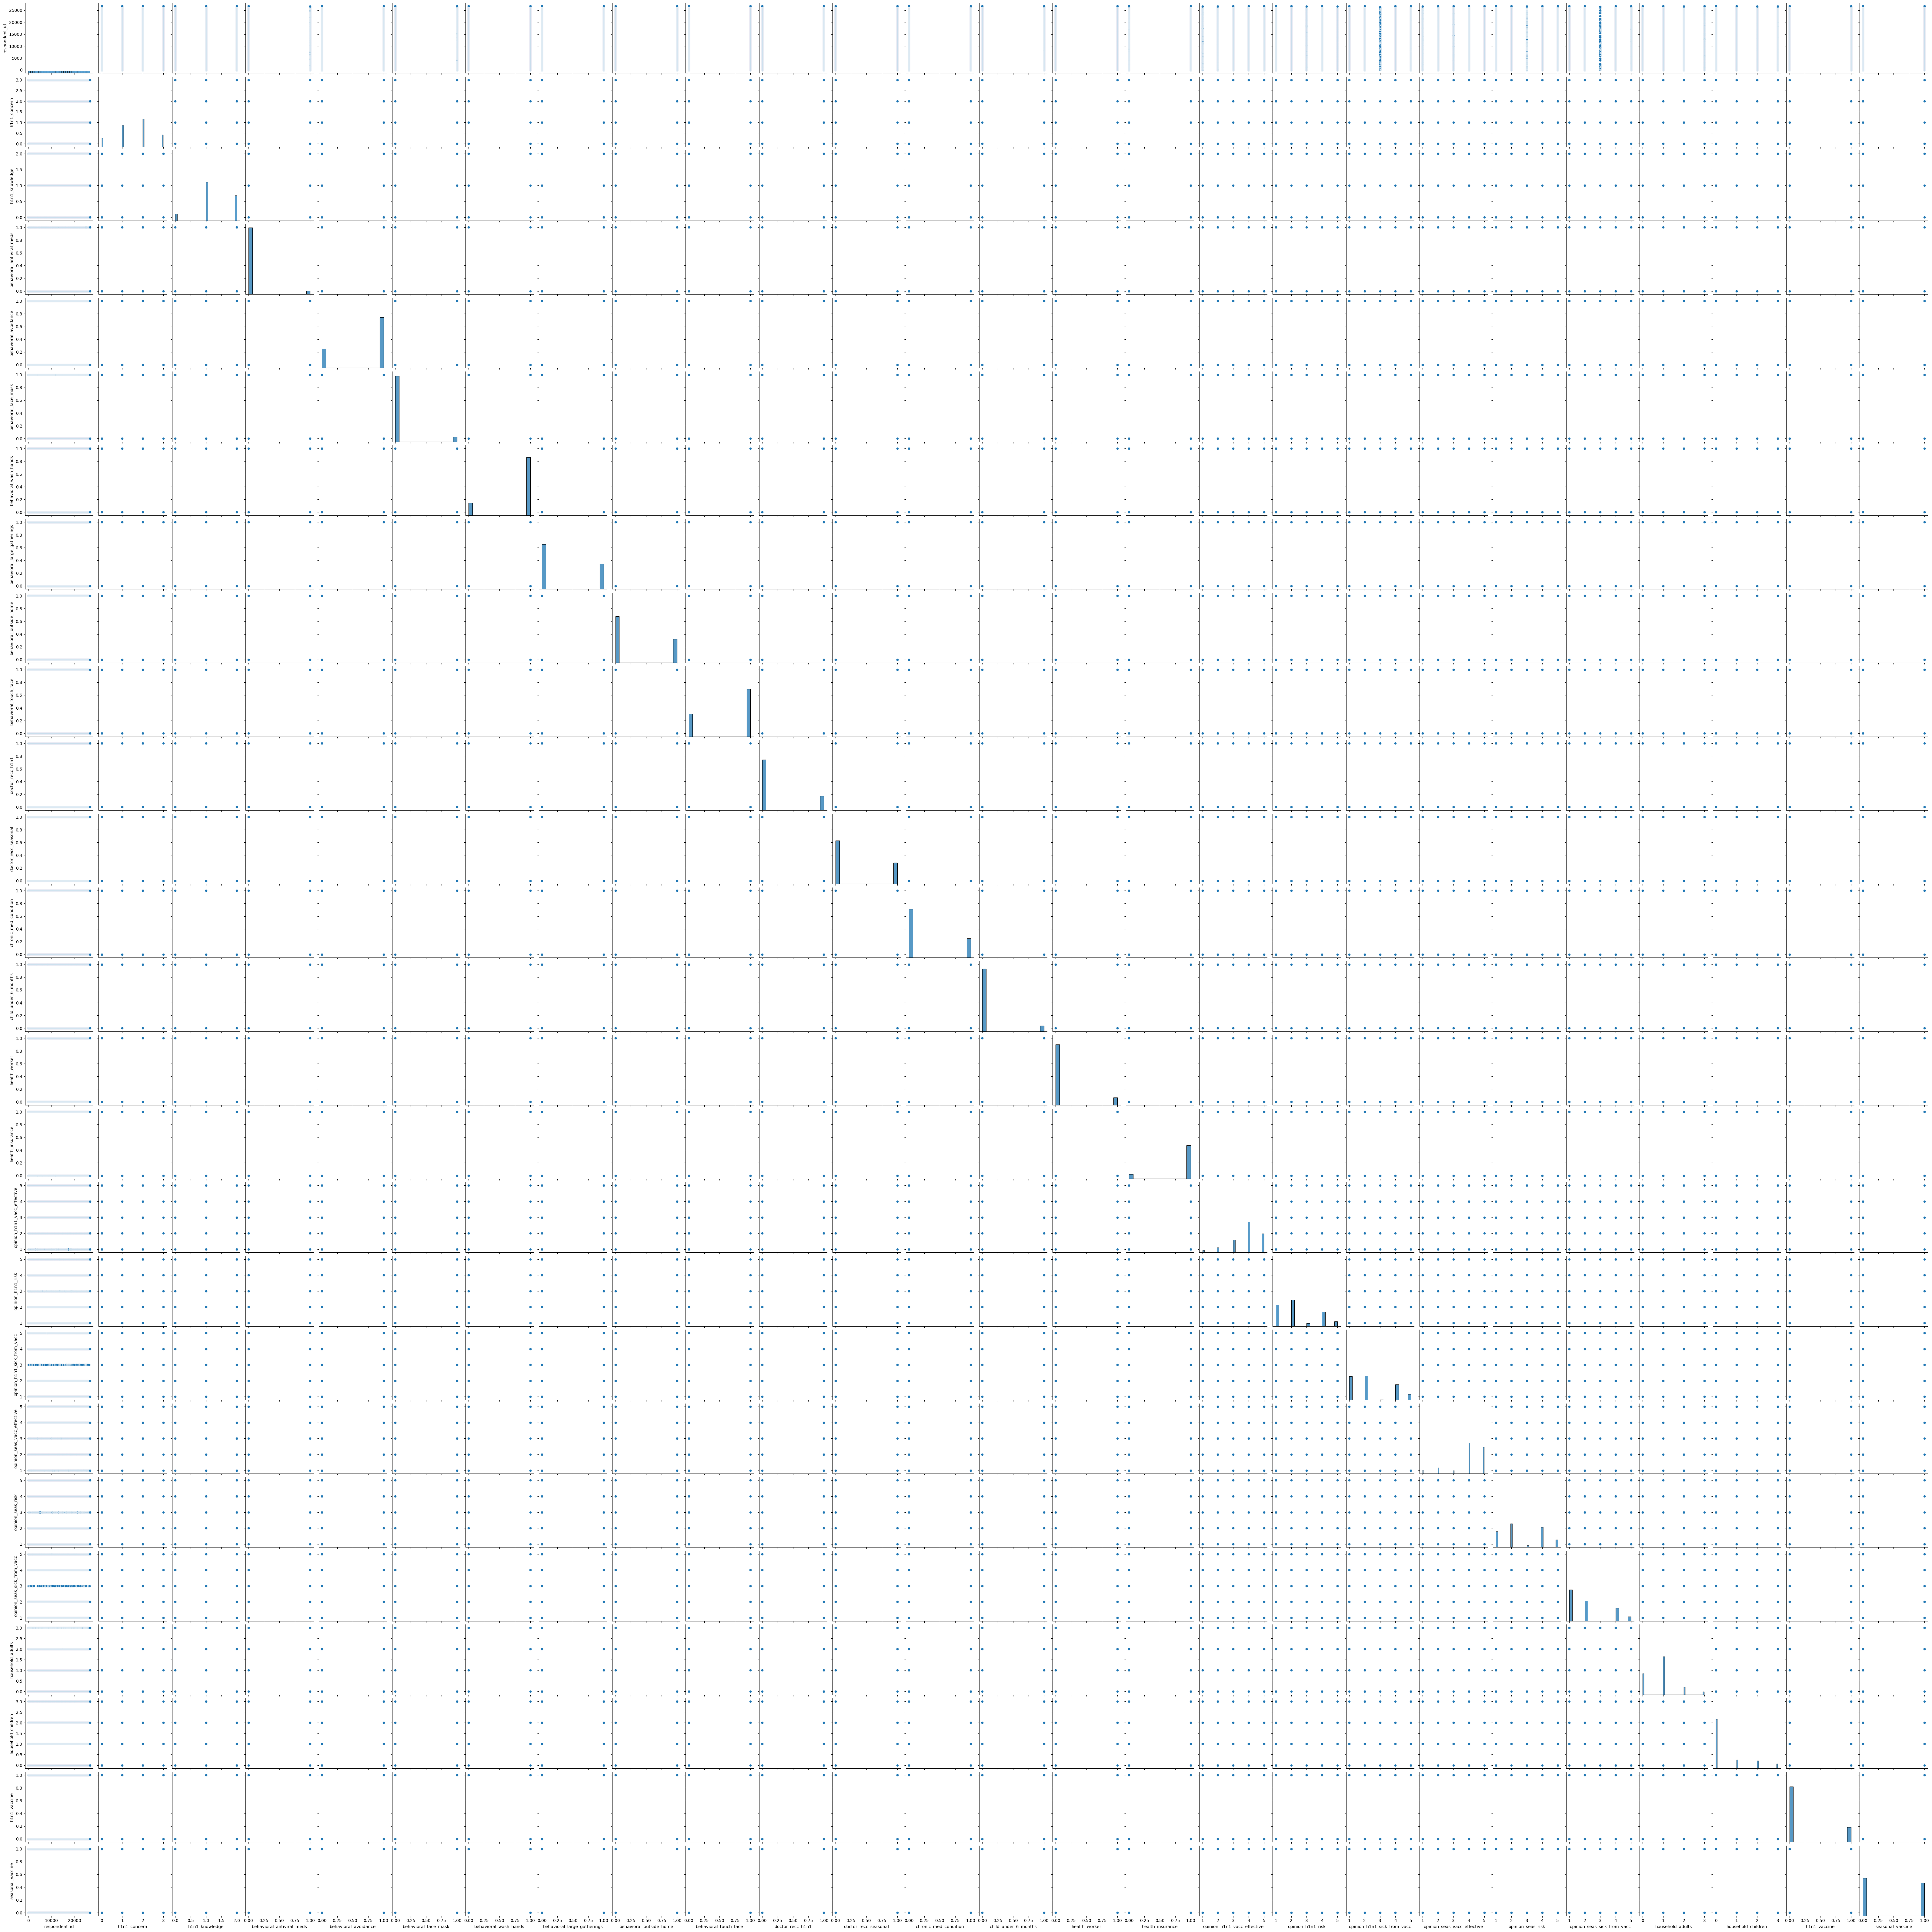

In [14]:
sns.pairplot(data)

## Feature Engineering

* Feature engineering is the process of transforming raw data into meaningful features that improve the performance of a machine learning model. It involves selecting, creating, or modifying features to enhance their predictive power. Techniques include handling missing values, encoding categorical variables, scaling numerical features, creating interaction terms, and performing dimensionality reduction. Effective feature engineering helps models learn better patterns, reduces overfitting, and improves overall accuracy. It is a crucial step in the data preprocessing pipeline that directly impacts model performance.

### 1. Data Preprocessing

* Data preprocessing is the process of cleaning, transforming, and organizing raw data to make it suitable for machine learning models. It involves handling missing values, removing duplicates, encoding categorical variables, scaling numerical data, and normalizing distributions. Additionally, feature selection and extraction techniques help improve model performance by reducing noise and redundancy. Proper data preprocessing ensures that the dataset is consistent, accurate, and structured, leading to better learning and more reliable predictions.

#### Handle the Null values

In [17]:
data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [18]:
def handle_missing_values(data, threshold=0.4):
    
    # Calculate missing value percentage for each column
    missing_percent = data.isnull().mean()

    # Identify columns to drop (more than 40% null values)
    cols_to_drop = missing_percent[missing_percent > threshold].index
    data = data.drop(columns=cols_to_drop)

    # Handle columns with 40% or fewer null values
    for col in data.columns:
        if data[col].isnull().sum() > 0:  # Only process columns with missing values
            if data[col].dtype == 'object':  # Categorical column
                data[col].fillna(data[col].mode()[0], inplace=True)
            else:  # Numerical column
                data[col].fillna(data[col].mean(), inplace=True)
    return data

In [19]:
data = handle_missing_values(data)

In [20]:
data.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [21]:
data

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                   1.000000          0.000000              0.000000   
1                   1.000000          0.000000              0.000000   
2                   0.000000          0.220312              0.329735   
3                   0.000000          0.000000              1.000000   
4                   1.000000          0.000000              0.000000   
...                      ...               ...                   ...   
26702               0.000000          0.000000              0.000000   
26703               0.000000          1.000000              1.000000   
26704               1.000000          0.000000              0.000000   
26705               0.677264          0.000000              0.000000   
26706               0.000000          0.000000              0.000000   

       chronic_med_condition  child_under_6_months  health_worker  \
0                        0.0                   0.0            0.0   
1                        0.0                   0.0            0.0   
2                        1.0                   0.0            0.0   
3                        1.0                   0.0            0.0   
4                        0.0                   0.0            0.0   
...                      ...                   ...            ...   
26702           

In [22]:
data.drop(["respondent_id"],axis=1,inplace=True)

In [23]:
data.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0          0.000000              0.000000   
1                    1.0          0.000000              0.000000   
2                    0.0          0.220312              0.329735   
3                    0.0          0.000000              1.000000   
4                    1.0          0.000000              0.000000   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                          3.0                1.0   
1                          5.0                4.0   
2                          3.0                1.0   
3                          3.0                3.0   
4                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own            Employed       qufhixun  MSA, Not Principle  City   
3        Rent  Not in Labor Force       lrircsnp       MSA, Principle City   
4         Own            Employed       qufhixun  MSA, Not Princ

#### Handle the Outliers:-
* Outliers are data points that differ significantly from the rest of the dataset. They are unusual values that are either much higher or much lower than most of the other observations. Outliers can occur due to various reasons, such as data entry errors, measurement mistakes, natural variability in data, or the presence of a different pattern or trend. Detecting and handling outliers is crucial in data analysis because they can distort statistical summaries and negatively impact machine learning models. Common methods for identifying outliers include using the Interquartile Range (IQR), Z-score, and visualization techniques like box plots and scatter plots. Depending on the context, outliers can be removed, transformed, or treated with special techniques to ensure they do not negatively affect model performance.

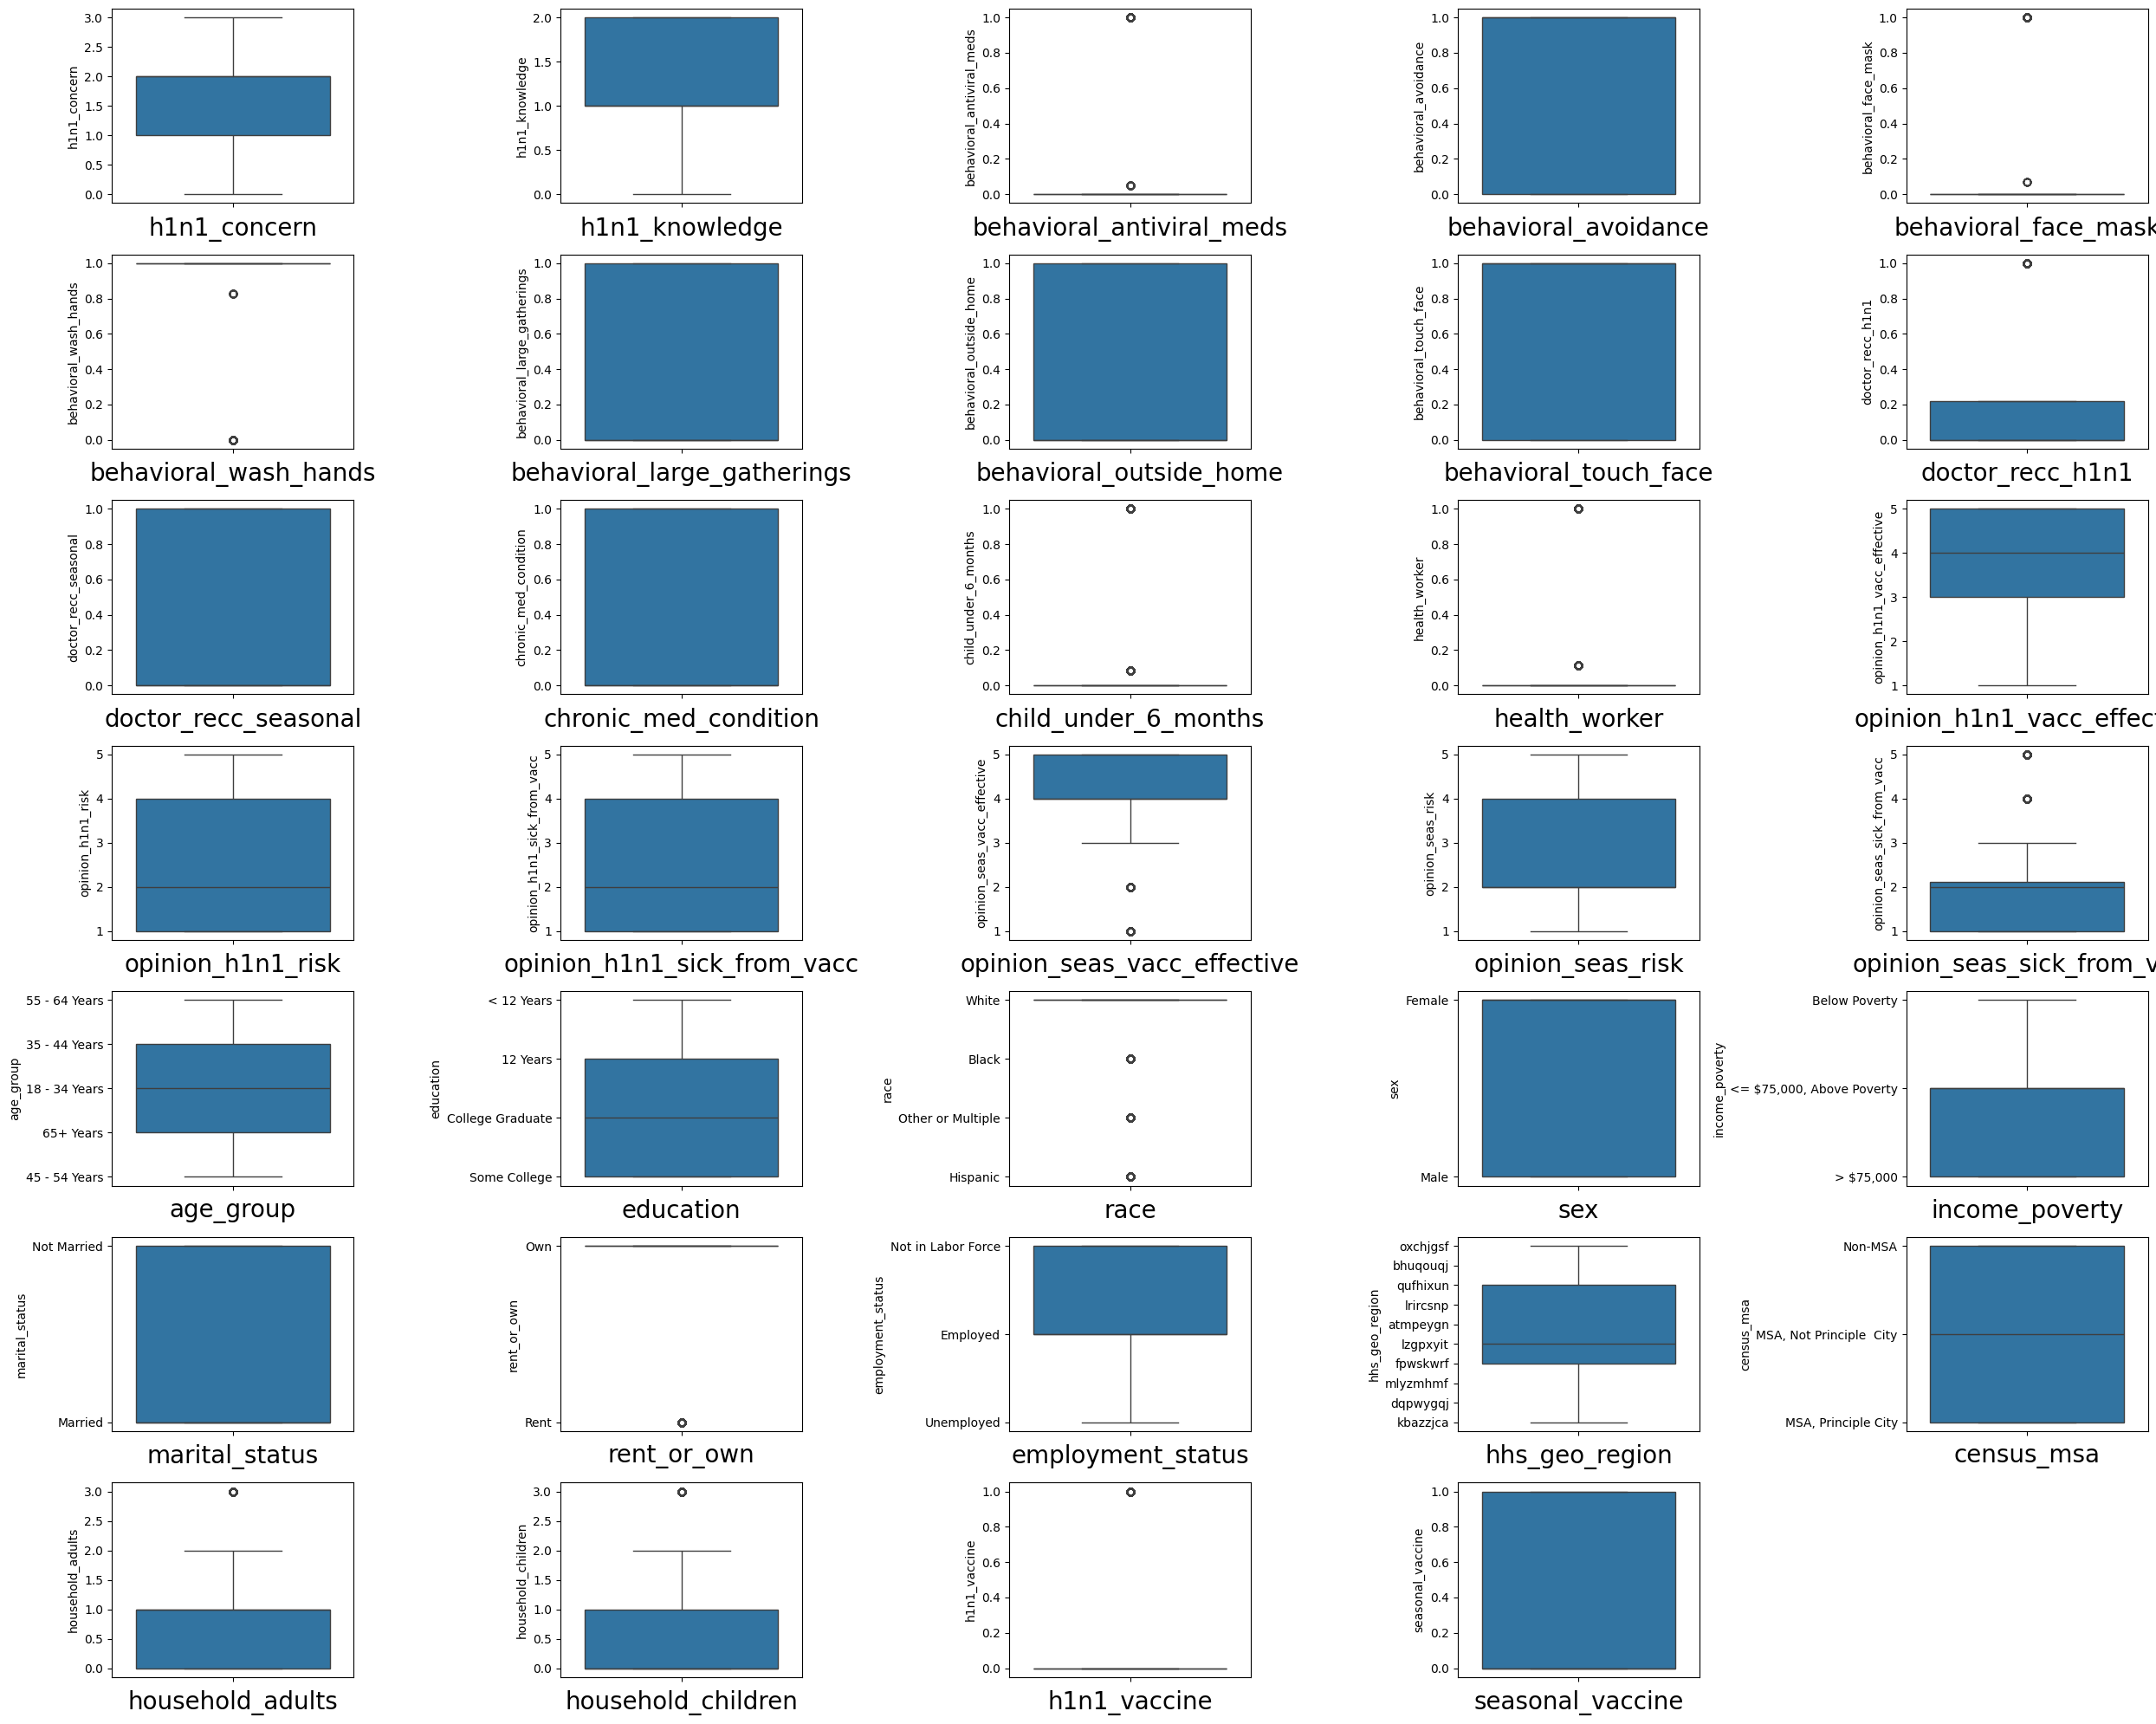

In [24]:
plt.figure(figsize=(25,20))
plt_num = 1
for column in data:
    if plt_num <= 35:
        plt.subplot(7,5,plt_num)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plt_num += 1
plt.tight_layout()

In [25]:
def handle_outliers_iqr(data):
    if data is None or not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a valid Pandas DataFrame")

    # Select numerical columns (int64 and float64) but exclude binary columns (0/1)
    num_cols = data.select_dtypes(include=['int64', 'float64']).columns

    # Exclude binary columns (assumed to have only 0s and 1s)
    non_binary_cols = [col for col in num_cols if data[col].nunique() > 2]

    for col in non_binary_cols:
        Q1 = data[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = data[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound

        # Replace outliers with the median of the column
        median_value = data[col].median()
        data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), median_value, data[col])

    return data

In [26]:
data = handle_outliers_iqr(data)

In [27]:
data["h1n1_vaccine"].unique()

array([0, 1], dtype=int64)

In [28]:
data["seasonal_vaccine"].unique()

array([0, 1], dtype=int64)

In [29]:
data.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    1.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    1.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0          0.000000              0.000000   
1                    1.0          0.000000              0.000000   
2                    0.0          0.220312              0.329735   
3                    0.0          0.000000              1.000000   
4                    1.0          0.000000              0.000000   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                          3.0                1.0   
1                          5.0                4.0   
2                          3.0                1.0   
3                          3.0                3.0   
4                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          4.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          2.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          2.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own            Employed       qufhixun  MSA, Not Principle  City   
3        Rent  Not in Labor Force       lrircsnp       MSA, Principle City   
4         Own            Employed       qufhixun  MSA, Not Princ

In [30]:
data["age_group"].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [31]:
def handle_age_column(data, age_column="age_group"):
    
    if data is None or not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a valid Pandas DataFrame")

    # Define mapping for age groups
    age_mapping = {
        '18 - 34 Years': 26,  # Midpoint of 18-34
        '35 - 44 Years': 39,  # Midpoint of 35-44
        '45 - 54 Years': 49,  # Midpoint of 45-54
        '55 - 64 Years': 59,  # Midpoint of 55-64
        '65+ Years': 70       # Approximate value for 65+
    }

    # Apply mapping
    if age_column in data.columns:
        data[age_column] = data[age_column].map(age_mapping)

    return data

In [32]:
data = handle_age_column(data, age_column="age_group")

In [33]:
data.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    1.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    1.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0          0.000000              0.000000   
1                    1.0          0.000000              0.000000   
2                    0.0          0.220312              0.329735   
3                    0.0          0.000000              1.000000   
4                    1.0          0.000000              0.000000   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                          3.0                1.0   
1                          5.0                4.0   
2                          3.0                1.0   
3                          3.0                3.0   
4                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          4.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc  age_group  \
0                1.0                          2.0         59   
1                2.0                          2.0         39   
2                1.0                          2.0         26   
3                4.0                          1.0         70   
4                1.0                          2.0         49   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own            Employed       qufhixun  MSA, Not Principle  City   
3        Rent  Not in Labor Force       lrircsnp       MSA, Principle City   
4         Own            Employed       qufhixun  MSA, Not Principle  City   

   househ

In [34]:
data["education"].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College'],
      dtype=object)

In [35]:
data["education"] = data['education'].replace({"< 12 Years":"12th not completed","12 Years":"12th Pass","College Graduate":"Grduate","Some College":"College Dropout"})

In [36]:
data["education"].unique()

array(['12th not completed', '12th Pass', 'Grduate', 'College Dropout'],
      dtype=object)

#### Encoding Technique:- 
* Encoding is the process of converting categorical data into numerical form so that machine learning models can understand and process it. Since most algorithms work with numerical data, encoding helps transform text or labels into numbers while preserving the meaning of the original data. There are different types of encoding techniques, such as One-Hot Encoding, Label Encoding, Ordinal Encoding, and Binary Encoding.

1. Label Encoding assigns a unique number to each category (e.g., "Red" = 0, "Blue" = 1, "Green" = 2).

2. One-Hot Encoding creates separate binary columns for each category, where "1" represents the presence of a category and "0" represents its absence.

3. Ordinal Encoding is used when categorical data has a meaningful order (e.g., "Low" = 0, "Medium" = 1, "High" = 2).

* Binary Encoding converts categories into binary numbers and stores them in separate columns, which reduces the number of dimensions compared to One-Hot Encoding.

* Choosing the right encoding technique depends on the dataset and the machine learning model being used. Proper encoding ensures that categorical features contribute effectively to model training and improve overall accuracy.

#### Oridnal Encoding :-
* Ordinal Encoding is a technique used to convert categorical data into numerical values while preserving the order or ranking of the categories. It is useful when the categorical values have a meaningful sequence or hierarchy but no fixed numerical difference between them.

In [37]:
from sklearn.preprocessing import OrdinalEncoder
education_order = [
    "12th not completed",  # 0
    "12th Pass",           # 1
    "College Dropout",     # 2
    "Grduate"             # 3
]
oe = OrdinalEncoder(categories=[education_order])
data[["education"]] = oe.fit_transform(data[["education"]])

In [38]:
data["education"].unique()

array([0., 1., 3., 2.])

In [39]:
data.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    1.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    1.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0          0.000000              0.000000   
1                    1.0          0.000000              0.000000   
2                    0.0          0.220312              0.329735   
3                    0.0          0.000000              1.000000   
4                    1.0          0.000000              0.000000   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                          3.0                1.0   
1                          5.0                4.0   
2                          3.0                1.0   
3                          3.0                3.0   
4                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          4.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc  age_group  education  \
0                1.0                          2.0         59        0.0   
1                2.0                          2.0         39        1.0   
2                1.0                          2.0         26        3.0   
3                4.0                          1.0         70        1.0   
4                1.0                          2.0         49        2.0   

    race     sex             income_poverty marital_status rent_or_own  \
0  White  Female              Below Poverty    Not Married         Own   
1  White    Male              Below Poverty    Not Married        Rent   
2  White    Male  <= $75,000, Above Poverty    Not Married         Own   
3  White  Female              Below Poverty    Not Married        Rent   
4  White  Female  <= $75,000, Above Poverty        Married         Own   

    employment_status hhs_geo_region                census_msa  \
0  Not in Labor Force       oxchjgsf                   Non-MSA   
1            Employed       bhuqouqj  MSA, Not Principle  City   
2            Employed       qufhixun  MSA, Not Principle  City   
3  Not in Labor Force       lrircsnp       MSA, Principle City   
4            Employed       qufhixun  MSA, Not Principle  City   

   household_adults  household_children  h1n1_vacci

In [40]:
data["race"].unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

#### Label Encoding :-
* Label Encoding is a technique used to convert categorical data into numerical values by assigning a unique number to each category. It is commonly used in machine learning to transform text-based labels into numbers so that algorithms can process the data effectively.

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["race"] = le.fit_transform(data["race"])
data["sex"] = le.fit_transform(data["sex"])
data["marital_status"] = le.fit_transform(data["marital_status"])
data["rent_or_own"] = le.fit_transform(data["rent_or_own"])

In [42]:
data.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    1.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    1.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0          0.000000              0.000000   
1                    1.0          0.000000              0.000000   
2                    0.0          0.220312              0.329735   
3                    0.0          0.000000              1.000000   
4                    1.0          0.000000              0.000000   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                          3.0                1.0   
1                          5.0                4.0   
2                          3.0                1.0   
3                          3.0                3.0   
4                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          4.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc  age_group  education  race  \
0                1.0                          2.0         59        0.0     3   
1                2.0                          2.0         39        1.0     3   
2                1.0                          2.0         26        3.0     3   
3                4.0                          1.0         70        1.0     3   
4                1.0                          2.0         49        2.0     3   

   sex             income_poverty  marital_status  rent_or_own  \
0    0              Below Poverty               1            0   
1    1              Below Poverty               1            1   
2    1  <= $75,000, Above Poverty               1            0   
3    0              Below Poverty               1            1   
4    0  <= $75,000, Above Poverty               0            0   

    employment_status hhs_geo_region                census_msa  \
0  Not in Labor Force       oxchjgsf                   Non-MSA   
1            Employed       bhuqouqj  MSA, Not Principle  City   
2            Employed       qufhixun  MSA, Not Principle  City   
3  Not in Labor Force       lrircsnp       MSA, Principle City   
4            Employed       qufhixun  MSA, Not Principle  City   

   household_adults  household_children  h1n1_vaccine  seasonal

In [43]:
data["sex"].unique()

array([0, 1])

In [44]:
data["marital_status"].unique()

array([1, 0])

In [45]:
data["rent_or_own"].unique()

array([0, 1])

In [46]:
data["employment_status"].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed'], dtype=object)

In [47]:
data["employment_status"] = data["employment_status"].replace({"Not in Labor Force":"Not_LaborForce"})

In [48]:
data["employment_status"].unique()

array(['Not_LaborForce', 'Employed', 'Unemployed'], dtype=object)

In [49]:
data["income_poverty"].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
      dtype=object)

In [50]:
data["hhs_geo_region"].unique()

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

In [51]:
data["census_msa"].unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

#### OneHot Encoding:-
* One-Hot Encoding is a technique used to convert categorical data into a binary format, ensuring that machine learning models can process it effectively. Instead of assigning a single numerical value to each category (as in Label Encoding), One-Hot Encoding creates separate binary columns for each category.

In [52]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()
df = pd.get_dummies(data["sex"],dtype="int64",prefix="sex")
df1 = pd.get_dummies(data["marital_status"],dtype="int64",prefix="marital_status")
df2 = pd.get_dummies(data["rent_or_own"],dtype="int64",prefix="rent_or_own")
df3 = pd.get_dummies(data["employment_status"],dtype="int64",prefix="employment_status")

In [53]:
data = pd.concat([data,df,df1,df2,df3],axis=1)
data.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    1.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    1.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0          0.000000              0.000000   
1                    1.0          0.000000              0.000000   
2                    0.0          0.220312              0.329735   
3                    0.0          0.000000              1.000000   
4                    1.0          0.000000              0.000000   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                          3.0                1.0   
1                          5.0                4.0   
2                          3.0                1.0   
3                          3.0                3.0   
4                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          4.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc  age_group  education  race  \
0                1.0                          2.0         59        0.0     3   
1                2.0                          2.0         39        1.0     3   
2                1.0                          2.0         26        3.0     3   
3                4.0                          1.0         70        1.0     3   
4                1.0                          2.0         49        2.0     3   

   sex             income_poverty  marital_status  rent_or_own  \
0    0              Below Poverty               1            0   
1    1              Below Poverty               1            1   
2    1  <= $75,000, Above Poverty               1            0   
3    0              Below Poverty               1            1   
4    0  <= $75,000, Above Poverty               0            0   

  employment_status hhs_geo_region                census_msa  \
0    Not_LaborForce       oxchjgsf                   Non-MSA   
1          Employed       bhuqouqj  MSA, Not Principle  City   
2          Employed       qufhixun  MSA, Not Principle  City   
3    Not_LaborForce       lrircsnp       MSA, Principle City   
4          Employed       qufhixun  MSA, Not Principle  City   

   household_adults  household_children  h1n1_vaccine  seasonal_vaccine  \


In [54]:
data.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine', 'sex_0', 'sex_1', 'marital_status_0',
       'marital_status_1', 'rent_or_own_0', 'rent_or_own_1',
       'employment_status_Employed', 'employment_status_Not_LaborForce',
       'employment_status_

In [55]:
data.drop(["sex","marital_status","rent_or_own","employment_status"],axis=1,inplace=True)

In [56]:
data.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    1.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    1.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0          0.000000              0.000000   
1                    1.0          0.000000              0.000000   
2                    0.0          0.220312              0.329735   
3                    0.0          0.000000              1.000000   
4                    1.0          0.000000              0.000000   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                          3.0                1.0   
1                          5.0                4.0   
2                          3.0                1.0   
3                          3.0                3.0   
4                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          4.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc  age_group  education  race  \
0                1.0                          2.0         59        0.0     3   
1                2.0                          2.0         39        1.0     3   
2                1.0                          2.0         26        3.0     3   
3                4.0                          1.0         70        1.0     3   
4                1.0                          2.0         49        2.0     3   

              income_poverty hhs_geo_region                census_msa  \
0              Below Poverty       oxchjgsf                   Non-MSA   
1              Below Poverty       bhuqouqj  MSA, Not Principle  City   
2  <= $75,000, Above Poverty       qufhixun  MSA, Not Principle  City   
3              Below Poverty       lrircsnp       MSA, Principle City   
4  <= $75,000, Above Poverty       qufhixun  MSA, Not Principle  City   

   household_adults  household_children  h1n1_vaccine  seasonal_vaccine  \
0               0.0                 0.0             0                 0   
1               0.0                 0.0             0                 1   
2               2.0                 0.0             0                 0   
3               0.0                 0.0             0                 1   
4               1.0                 0.0    

In [57]:
data["income_poverty"].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
      dtype=object)

In [58]:
data["income_poverty"] = data["income_poverty"].replace({"Below Poverty":"Below_Poverty","<= $75,000":"Under_75000","> $75,000":"Above_75000"})

In [59]:
data["income_poverty"].unique()

array(['Below_Poverty', '<= $75,000, Above Poverty', 'Above_75000'],
      dtype=object)

In [60]:
data["hhs_geo_region"].unique()

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

In [61]:
data["census_msa"].unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

In [62]:
data["census_msa"] = data["census_msa"].replace({"Non-MSA":"Rural_Area","MSA, Not Principle  City":"Suburban_Area","MSA, Principle City":"Metropolitan_Area"})

In [63]:
data["census_msa"].unique()

array(['Rural_Area', 'Suburban_Area', 'Metropolitan_Area'], dtype=object)

In [64]:
data["income_poverty"] = le.fit_transform(data["income_poverty"])
data["hhs_geo_region"] = le.fit_transform(data["hhs_geo_region"])

In [65]:
df4 = pd.get_dummies(data["census_msa"],dtype="int64",prefix="census_msa")

In [66]:
data = pd.concat([data,df4],axis=1)

In [67]:
data.drop(["census_msa"],axis=1,inplace=True)

In [68]:
data.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    1.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    1.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0          0.000000              0.000000   
1                    1.0          0.000000              0.000000   
2                    0.0          0.220312              0.329735   
3                    0.0          0.000000              1.000000   
4                    1.0          0.000000              0.000000   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                          3.0                1.0   
1                          5.0                4.0   
2                          3.0                1.0   
3                          3.0                3.0   
4                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          4.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc  age_group  education  race  \
0                1.0                          2.0         59        0.0     3   
1                2.0                          2.0         39        1.0     3   
2                1.0                          2.0         26        3.0     3   
3                4.0                          1.0         70        1.0     3   
4                1.0                          2.0         49        2.0     3   

   income_poverty  hhs_geo_region  household_adults  household_children  \
0               2               8               0.0                 0.0   
1               2               1               0.0                 0.0   
2               0               9               2.0                 0.0   
3               2               5               0.0                 0.0   
4               0               9               1.0                 0.0   

   h1n1_vaccine  seasonal_vaccine  sex_0  sex_1  marital_status_0  \
0             0                 0      1      0                 0   
1             0                 1      0      1                 0   
2             0                 0      0      1                 0   
3             0                 1      1      0                 0   
4             0                 0      1      0              

In [69]:
data.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'income_poverty', 'hhs_geo_region',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine', 'sex_0', 'sex_1', 'marital_status_0',
       'marital_status_1', 'rent_or_own_0', 'rent_or_own_1',
       'employment_status_Employed', 'employment_status_Not_LaborForce',
       'employment_status_Unemployed', 'census_msa_Metropolitan_Area',
       'census_msa_Rural_Area', 'cens

In [70]:
data.drop(["behavioral_antiviral_meds","behavioral_face_mask","behavioral_wash_hands","child_under_6_months","health_worker"],axis=1,inplace=True)

### 2. Feature Selection

* Feature selection is the process of identifying and selecting the most relevant features from a dataset that contribute significantly to the model’s prediction, while eliminating redundant or irrelevant ones. This helps improve model performance by reducing noise, preventing overfitting, and speeding up computation. There are three main types of feature selection methods: Filter methods, which use statistical techniques like correlation and mutual information to select important features before training the model; Wrapper methods, which involve training and evaluating different subsets of features using techniques like Recursive Feature Elimination (RFE) and Forward Selection; and Embedded methods, where feature selection is integrated within the model, such as LASSO regression or decision tree-based feature importance. Feature selection enhances the interpretability of the model by focusing on the most significant variables, leading to more efficient and accurate predictions.

<Axes: >

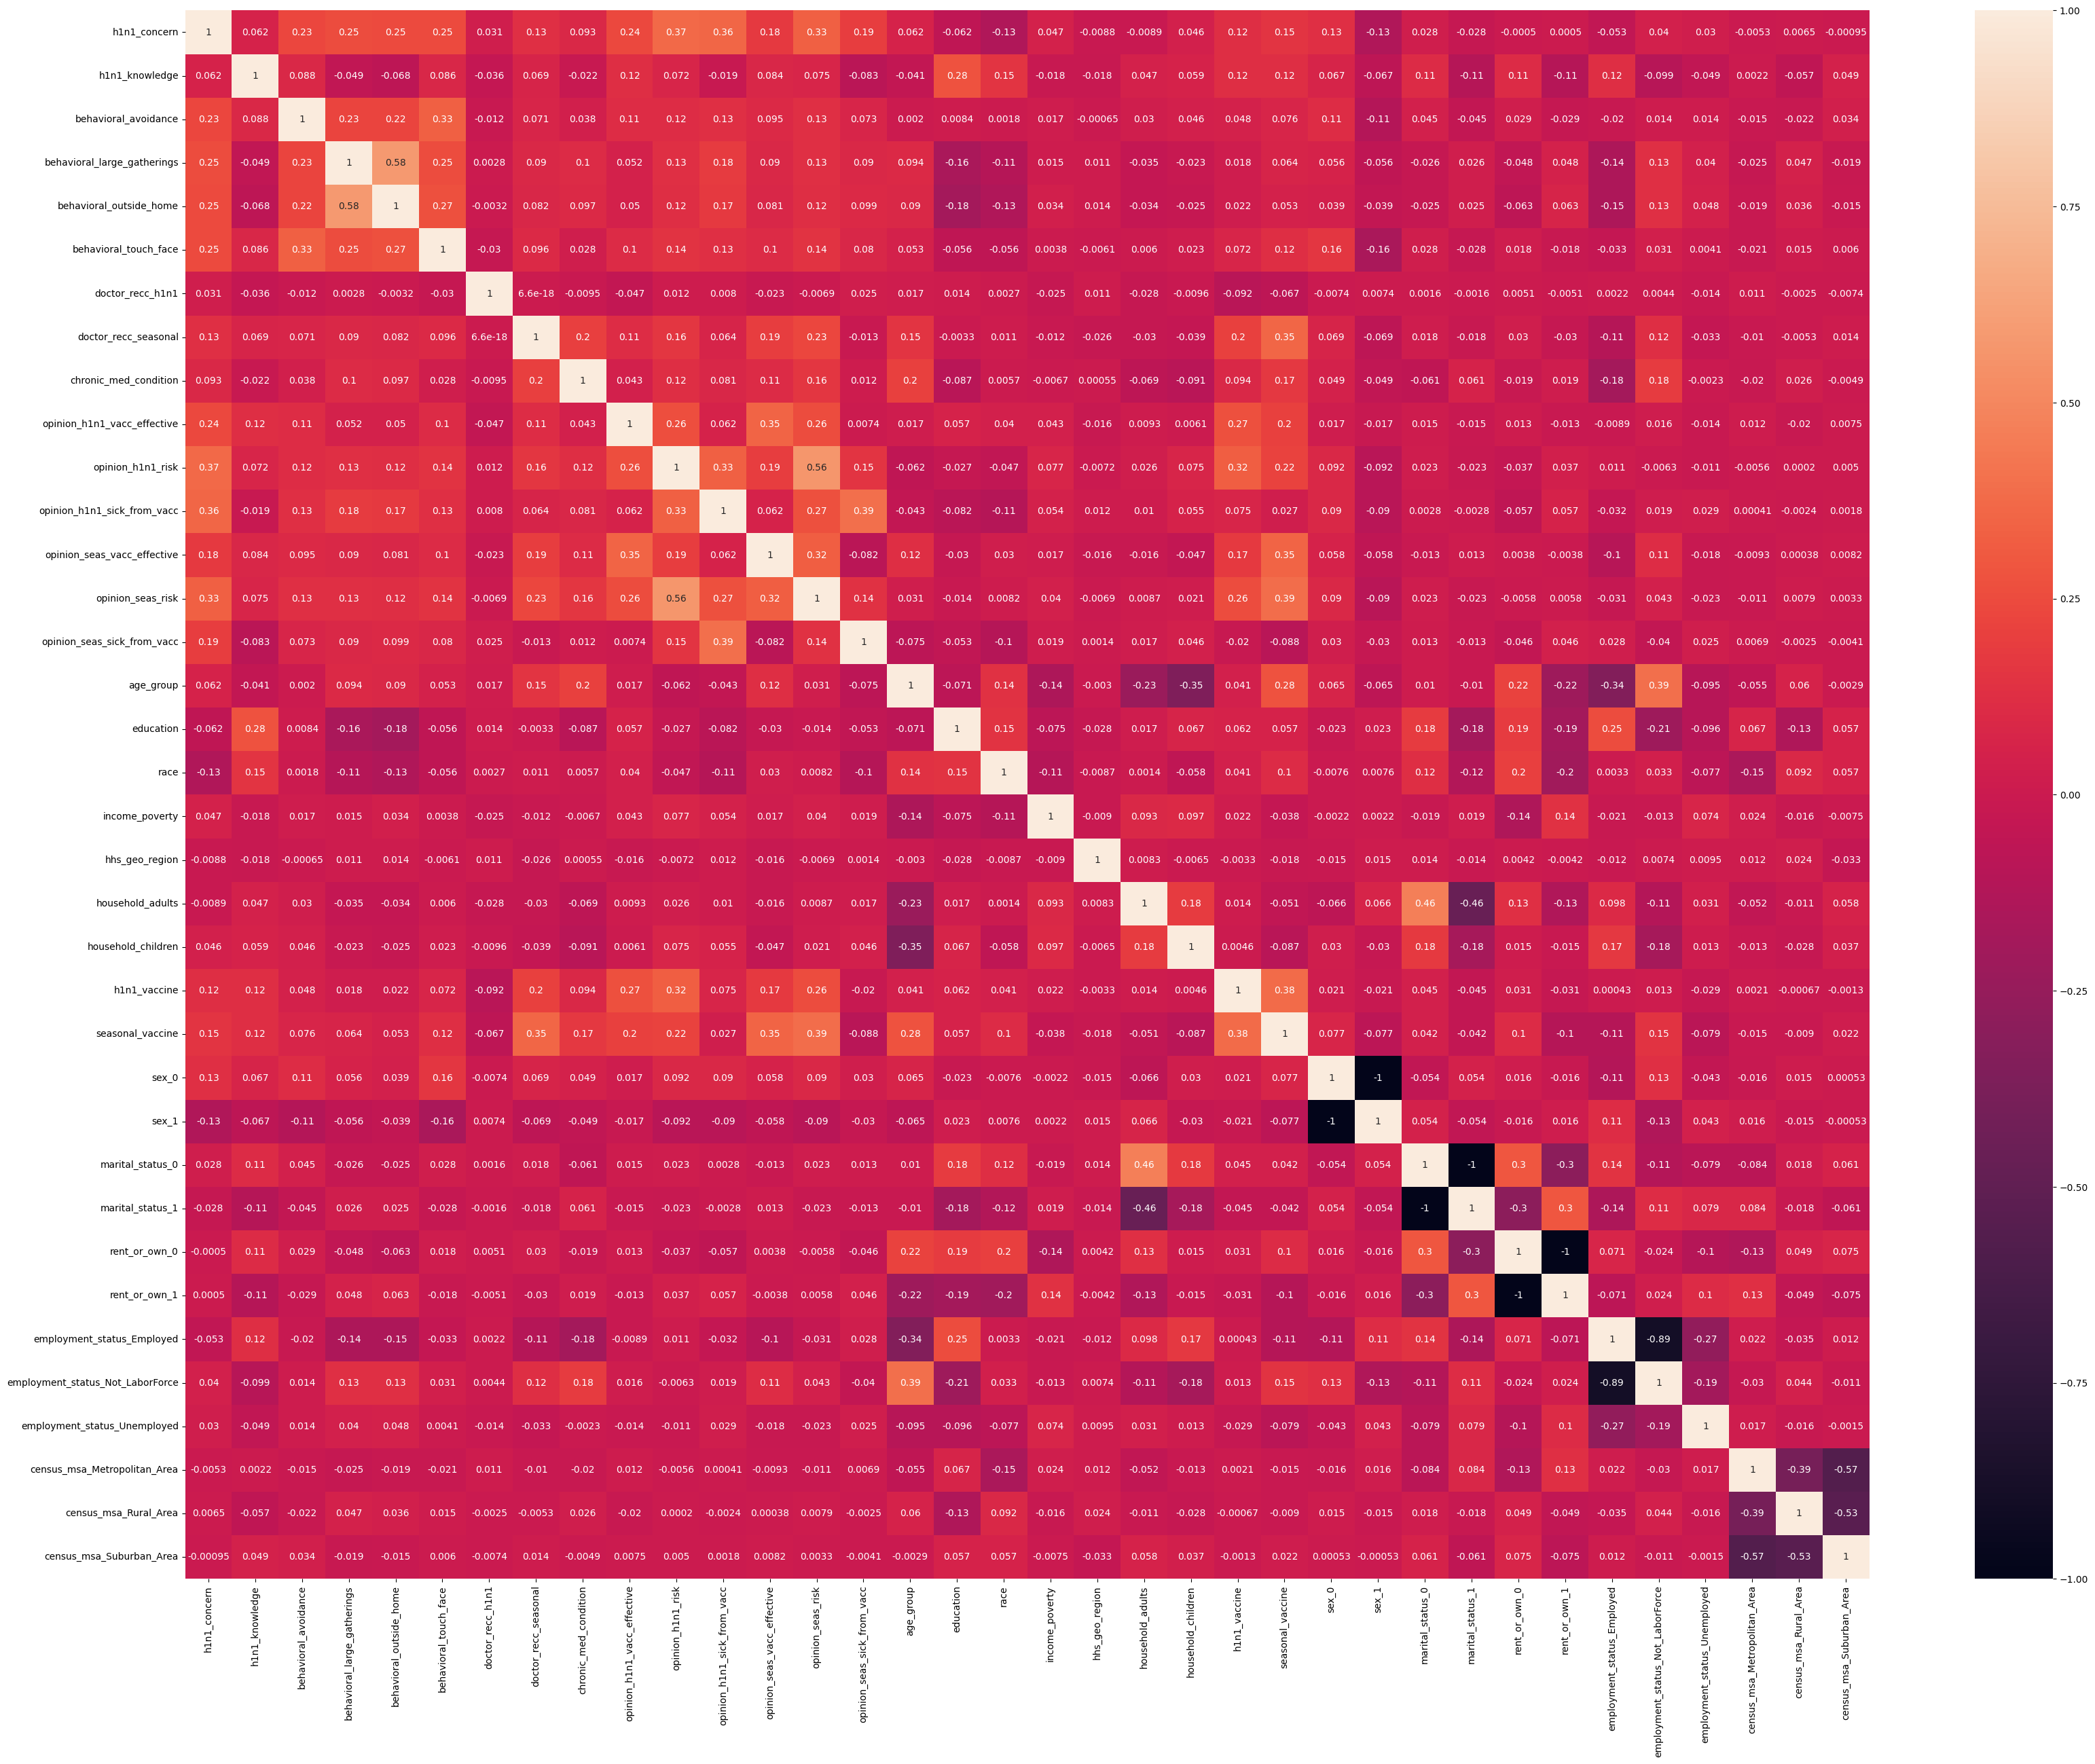

In [71]:
plt.figure(figsize=(40,30))
sns.heatmap(data.corr(),annot=True)

## Model Creation

* Model creation is the process of building a machine learning model to solve a specific problem by learning patterns from data. It involves several key steps, starting with data preprocessing, where the data is cleaned, transformed, and prepared for training. Next, the choice of algorithm is made based on the type of problem—classification, regression, clustering, or others. The selected algorithm is then trained using a dataset, where it learns relationships between input features and the target variable. Once trained, the model is evaluated using metrics like accuracy, precision, recall, or RMSE to measure its performance. If necessary, hyperparameter tuning is done to improve accuracy and efficiency. Finally, the trained model is tested on unseen data, deployed for real-world use, and monitored for performance improvements. Model creation is an iterative process that involves refining data, selecting the right features, and optimizing the model to ensure accurate and reliable predictions.

In [72]:
x = data.drop(["h1n1_vaccine","seasonal_vaccine"],axis=1)
y = data[["h1n1_vaccine","seasonal_vaccine"]]

In [73]:
x

h1n1_concern  h1n1_knowledge  behavioral_avoidance  \
0               1.0             0.0                   0.0   
1               3.0             2.0                   1.0   
2               1.0             1.0                   1.0   
3               1.0             1.0                   1.0   
4               2.0             1.0                   1.0   
...             ...             ...                   ...   
26702           2.0             0.0                   1.0   
26703           1.0             2.0                   1.0   
26704           2.0             2.0                   1.0   
26705           1.0             1.0                   0.0   
26706           0.0             0.0                   1.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                   1.000000          0.000000              0.000000   
1                   1.000000          0.000000              0.000000   
2                   0.000000          0.220312              0.329735   
3                   0.000000          0.000000              1.000000   
4                   1.000000          0.000000              0.000000   
...                      ...               ...                   ...   
26702               0.000000          0.000000              0.000000   
26703               0.000000          0.000000              1.000000   
26704               1.000000          0.000000              0.000000   
26705               0.677264          0.000000              0.000000   
26706               0.000000          0.000000              0.000000   

       chronic_med_condition  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                        0.0                          3.0                1.0   
1                        0.0                          5.0                4.0   
2                        1.0                          3.0                1.0   
3                        1.0                          3.0                3.0   
4                        0.0                          3.0                3.0   
...                      ...                          ...                ...   
26702                    0.0                          3.0                1.0   
26703                    0.0                          4.0                2.0   
26704                    0.0                          4.0                4.0   
26705                    0.0                          3.0                1.0   
26706                    0.0                          5.0                1.0   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                              2.0                          4.0   
1                              4.0                          4.0   
2                              1.0                          4.0   
3                              5.0                          5.0   
4                              2.0                          3.0   
...                            ...                          ...   
26702                          1.0                          5.0   
26703                          2.0                          5.0   
26704                          2.0                          5.0   
26705                

In [74]:
y

h1n1_vaccine  seasonal_vaccine
0                 0                 0
1                 0                 1
2                 0                 0
3                 0                 1
4                 0                 0
...             ...               ...
26702             0                 0
26703             0                 0
26704             0                 1
26705             0                 0
26706             0                 0

[26707 rows x 2 columns]

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [76]:
x_train

h1n1_concern  h1n1_knowledge  behavioral_avoidance  \
380             3.0             1.0              0.000000   
3665            2.0             0.0              0.000000   
13656           2.0             0.0              1.000000   
17931           3.0             2.0              1.000000   
25426           0.0             0.0              0.000000   
...             ...             ...                   ...   
13123           1.0             1.0              1.000000   
19648           1.0             1.0              0.000000   
9845            2.0             1.0              0.000000   
10799           2.0             2.0              0.725612   
2732            3.0             2.0              0.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
380                            0.0                      0.0   
3665                           0.0                      0.0   
13656                          1.0                      1.0   
17931                          1.0                      0.0   
25426                          0.0                      0.0   
...                            ...                      ...   
13123                          1.0                      1.0   
19648                          0.0                      0.0   
9845                           0.0                      0.0   
10799                          0.0                      0.0   
2732                           0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
380                      0.0          0.000000              0.000000   
3665                     0.0          0.000000              0.000000   
13656                    0.0          0.000000              1.000000   
17931                    0.0          0.220312              0.329735   
25426                    0.0          0.220312              0.329735   
...                      ...               ...                   ...   
13123                    1.0          0.000000              0.000000   
19648                    1.0          0.220312              0.329735   
9845                     0.0          0.000000              1.000000   
10799                    1.0          0.000000              1.000000   
2732                     1.0          0.000000              1.000000   

       chronic_med_condition  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
380                      1.0                          2.0                1.0   
3665                     0.0                          3.0                3.0   
13656                    1.0                          5.0                4.0   
17931                    0.0                          3.0                2.0   
25426                    0.0                          3.0                1.0   
...                      ...                          ...                ...   
13123                    0.0                          3.0                1.0   
19648                    1.0                          5.0                1.0   
9845                     0.0                          5.0                2.0   
10799                    1.0                          4.0                4.0   
2732                     0.0                          5.0                5.0   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
380                            4.0                          4.0   
3665                           2.0                          3.0   
13656                          4.0                          4.0   
17931                          4.0                          4.0   
25426                          1.0                          3.0   
...                            ...                          ...   
13123                          1.0                          4.0   
19648                          2.0                          5.0   
9845                           2.0                          4.0   
10799                

In [77]:
x_test

h1n1_concern  h1n1_knowledge  behavioral_avoidance  \
17088           2.0             1.0                   0.0   
1971            2.0             1.0                   1.0   
16698           1.0             2.0                   0.0   
22074           2.0             2.0                   0.0   
21458           2.0             1.0                   1.0   
...             ...             ...                   ...   
15189           0.0             2.0                   0.0   
2850            2.0             1.0                   1.0   
13385           2.0             0.0                   1.0   
18965           2.0             1.0                   1.0   
4148            3.0             1.0                   1.0   

       behavioral_large_gatherings  behavioral_outside_home  \
17088                          1.0                      0.0   
1971                           0.0                      0.0   
16698                          0.0                      0.0   
22074                          1.0                      0.0   
21458                          0.0                      1.0   
...                            ...                      ...   
15189                          0.0                      0.0   
2850                           1.0                      1.0   
13385                          1.0                      0.0   
18965                          1.0                      0.0   
4148                           1.0                      1.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
17088                    1.0               0.0                   1.0   
1971                     1.0               0.0                   1.0   
16698                    1.0               0.0                   0.0   
22074                    1.0               0.0                   0.0   
21458                    1.0               0.0                   1.0   
...                      ...               ...                   ...   
15189                    1.0               0.0                   0.0   
2850                     0.0               0.0                   1.0   
13385                    1.0               0.0                   1.0   
18965                    1.0               0.0                   0.0   
4148                     1.0               0.0                   0.0   

       chronic_med_condition  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
17088                    1.0                     4.000000                1.0   
1971                     0.0                     2.000000                2.0   
16698                    0.0                     3.850623                5.0   
22074                    1.0                     2.000000                2.0   
21458                    1.0                     5.000000                4.0   
...                      ...                          ...                ...   
15189                    1.0                     4.000000                1.0   
2850                     0.0                     4.000000                4.0   
13385                    0.0                     4.000000                2.0   
18965                    0.0                     1.000000                1.0   
4148                     0.0                     2.000000                1.0   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
17088                          1.0                          5.0   
1971                           5.0                          5.0   
16698                          4.0                          4.0   
22074                          4.0                          4.0   
21458                          2.0                          5.0   
...                            ...                          ...   
15189                          1.0                          4.0   
2850                           4.0                          4.0   
13385                          1.0                          4.0   
18965                

In [78]:
data["h1n1_vaccine"].value_counts()

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

In [79]:
data["seasonal_vaccine"].value_counts()

seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64

### SMOTE Technique :-
* SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used to handle class imbalance in machine learning. When dealing with imbalanced datasets, where one class has significantly fewer samples than another, models tend to be biased towards the majority class. SMOTE helps by generating synthetic samples for the minority class instead of simply duplicating existing ones.

In [80]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

# Create a new combined label
y_train_combined = y_train['h1n1_vaccine'].astype(str) + "_" + y_train['seasonal_vaccine'].astype(str)

# Apply SMOTE to the combined labels
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote_combined = sm.fit_resample(x_train, y_train_combined)

# Split back into two target variables
y_train_smote = y_train_smote_combined.str.split("_", expand=True).astype(int)
y_train_smote.columns = ['h1n1_vaccine', 'seasonal_vaccine']

# Check class distribution
print(y_train_smote['h1n1_vaccine'].value_counts())
print(y_train_smote['seasonal_vaccine'].value_counts())

h1n1_vaccine
0    19908
1    19908
Name: count, dtype: int64
seasonal_vaccine
0    19908
1    19908
Name: count, dtype: int64


## Model Selection

* Model selection is the process of choosing the best machine learning model for a given dataset and problem. Different models have different strengths and weaknesses, and selecting the most suitable one ensures better performance and accuracy. The selection depends on various factors such as the nature of the data, problem type (classification, regression, clustering, etc.), computational efficiency, and interpretability.

### 1. Logistic Regression Algorithm

* Logistic Regression is a statistical and machine learning algorithm used for binary classification problems—where the target variable has two possible outcomes (e.g., Yes/No, 0/1, True/False). Unlike Linear Regression, which predicts continuous values, Logistic Regression predicts probabilities and maps them into a range between 0 and 1 using the sigmoid function.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
LR = LogisticRegression()
FLR = MultiOutputClassifier(LR)
FLR.fit(x_train,y_train)

MultiOutputClassifier(estimator=LogisticRegression())

In [82]:
y_lr = FLR.predict(x_test)

#### Logistic Regression Metrics :-
* Logistic regression metrics help evaluate the performance of a classification model by analyzing how well it distinguishes between classes. Accuracy is a fundamental metric that calculates the proportion of correct predictions out of all predictions, but it may not be reliable for imbalanced datasets. Precision measures the proportion of correctly predicted positive cases among all predicted positives, making it useful when false positives are costly, such as in fraud detection. Recall, also known as sensitivity or the true positive rate, evaluates the ability of the model to correctly identify actual positive cases, which is important in scenarios like medical diagnosis where missing a positive case can have severe consequences. The F1-score combines precision and recall into a single metric by calculating their harmonic mean, making it a balanced choice when both false positives and false negatives matter. Another crucial metric is the ROC-AUC score, where the Receiver Operating Characteristic (ROC) curve plots the true positive rate against the false positive rate at various threshold levels, and the Area Under the Curve (AUC) quantifies the model's ability to differentiate between classes. A higher AUC indicates a better-performing model. By analyzing these metrics together, one can make informed decisions about model performance and whether further improvements, such as threshold adjustments, feature selection, or resampling techniques, are needed.

In [83]:
from sklearn.metrics import *

In [84]:
a1 = accuracy_score(y_test,y_lr)
a1

0.6407069042983375

In [85]:
y_tlr = FLR.predict(x_train)

In [86]:
t1 = accuracy_score(y_train,y_tlr)
t1

0.6442336495257114

In [87]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.65      0.28      0.40      1447
           1       0.77      0.73      0.75      3092

   micro avg       0.75      0.59      0.66      4539
   macro avg       0.71      0.51      0.57      4539
weighted avg       0.73      0.59      0.63      4539
 samples avg       0.33      0.30      0.31      4539



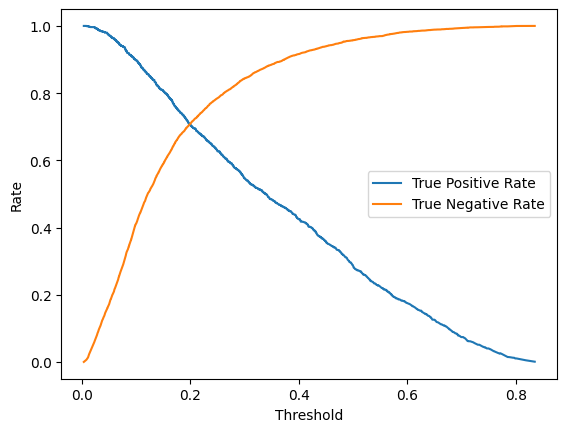

In [88]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for each label
y_probs = FLR.predict_proba(x_test)  

# If you have multiple labels, choose one label to analyze
label_index = 0  # Choose the first label
y_probs_label = y_probs[label_index][:, 1]  # Get probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test.iloc[:, label_index], y_probs_label)

# Plot ROC Curve
plt.plot(thresholds, tpr, label='True Positive Rate')
plt.plot(thresholds, 1 - fpr, label='True Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend()
plt.show()

## Decision Tree Algorithm

* A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It works by splitting the dataset into smaller subsets based on specific conditions, creating a tree-like structure where each internal node represents a decision rule, each branch represents an outcome, and each leaf node represents a final prediction. The process starts from a root node and follows a series of if-else conditions to reach the final decision. Decision Trees use measures like Gini impurity or entropy (in the case of classification) and mean squared error (in regression) to determine the best feature to split on at each step. One of the main advantages of Decision Trees is their interpretability, as they closely resemble human decision-making. However, they are prone to overfitting, which means they can perform well on training data but poorly on unseen data. Techniques like pruning, setting a maximum depth, or using ensemble methods such as Random Forest and Gradient Boosting can help improve their generalization ability. Decision Trees are widely used in various domains, including healthcare, finance, and marketing, where clear decision-making processes are required.

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
fdt = MultiOutputClassifier(dt)
fdt.fit(x_train,y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier())

In [90]:
y_dt = fdt.predict(x_test)

In [91]:
a2 = accuracy_score(y_test,y_dt)
a2

0.4931855623783136

In [92]:
y_tdt = fdt.predict(x_train)

In [93]:
t2 = accuracy_score(y_train,y_tdt)
t2

1.0

In [94]:
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.36      0.40      0.38      1447
           1       0.65      0.65      0.65      3092

   micro avg       0.55      0.57      0.56      4539
   macro avg       0.50      0.53      0.51      4539
weighted avg       0.56      0.57      0.56      4539
 samples avg       0.30      0.29      0.28      4539



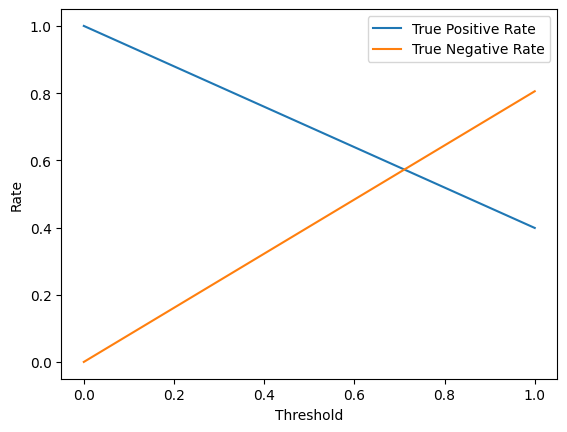

In [95]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for each label
y_probs = fdt.predict_proba(x_test)  

# If you have multiple labels, choose one label to analyze
label_index = 0  # Choose the first label
y_probs_label = y_probs[label_index][:, 1]  # Get probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test.iloc[:, label_index], y_probs_label)

# Plot ROC Curve
plt.plot(thresholds, tpr, label='True Positive Rate')
plt.plot(thresholds, 1 - fpr, label='True Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend()
plt.show()

## Bagging Algorithm

* Bagging, or Bootstrap Aggregating, is an ensemble learning technique that improves the stability and accuracy of machine learning models by reducing variance and preventing overfitting. It works by generating multiple subsets of the original dataset through bootstrapping, where each subset is created by randomly selecting data points with replacement. A separate model is then trained on each subset, and the final prediction is obtained by averaging the outputs for regression tasks or taking a majority vote for classification tasks. The most well-known example of bagging is the Random Forest algorithm, which applies bagging to Decision Trees to enhance performance. Bagging is particularly effective for high-variance models like Decision Trees, as it smooths out individual fluctuations in predictions, leading to a more robust and generalized model. This technique is widely used in domains requiring reliable predictions, such as finance, healthcare, and fraud detection, where reducing model instability is crucial for decision-making.

In [96]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()
fbg = MultiOutputClassifier(bg)
fbg.fit(x_train,y_train)

MultiOutputClassifier(estimator=BaggingClassifier())

In [97]:
y_bg = fbg.predict(x_test)

In [98]:
a3 = accuracy_score(y_test,y_bg)
a3

0.6098547251759773

In [99]:
y_tbg = fbg.predict(x_train)

In [100]:
t3 = accuracy_score(y_train,y_tbg)
t3

0.9656015976035947

In [101]:
print(classification_report(y_test,y_bg))

              precision    recall  f1-score   support

           0       0.57      0.30      0.40      1447
           1       0.75      0.67      0.71      3092

   micro avg       0.71      0.55      0.62      4539
   macro avg       0.66      0.48      0.55      4539
weighted avg       0.69      0.55      0.61      4539
 samples avg       0.31      0.28      0.28      4539



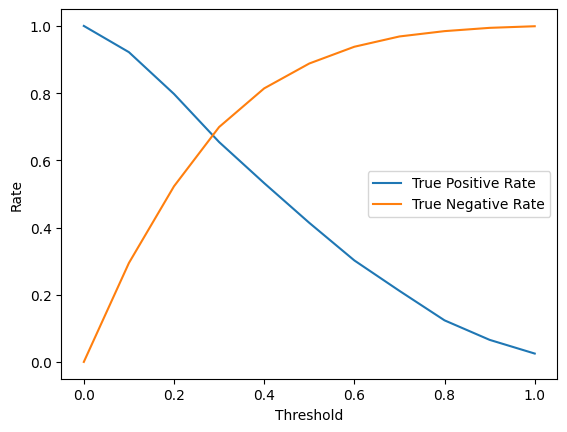

In [102]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for each label
y_probs = fbg.predict_proba(x_test)  

# If you have multiple labels, choose one label to analyze
label_index = 0  # Choose the first label
y_probs_label = y_probs[label_index][:, 1]  # Get probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test.iloc[:, label_index], y_probs_label)

# Plot ROC Curve
plt.plot(thresholds, tpr, label='True Positive Rate')
plt.plot(thresholds, 1 - fpr, label='True Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend()
plt.show()

### RandomForest Algorithm :- 
* Random Forest (RF) is an ensemble learning algorithm that combines multiple Decision Trees to improve accuracy, reduce overfitting, and enhance model stability. It follows the Bagging (Bootstrap Aggregating) technique, where multiple subsets of the training data are created through random sampling with replacement. Each subset is used to train an individual Decision Tree, and during training, only a random subset of features is considered at each split, making the trees diverse and less correlated. For classification tasks, the final prediction is made using majority voting among all trees, while for regression tasks, the predictions are averaged. Random Forest is known for handling high-dimensional data, dealing with missing values, and being less sensitive to outliers. It performs well in various applications, including fraud detection, medical diagnosis, and stock market prediction. However, Random Forest can be computationally expensive for large datasets due to the need to train multiple trees. Despite this, it remains a powerful and widely used machine learning algorithm due to its high accuracy and robustness.

In [103]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()
frm = MultiOutputClassifier(rm)
frm.fit(x_train,y_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [104]:
y_rm = frm.predict(x_test)

In [105]:
a4 = accuracy_score(y_test,y_rm)
a4

0.6438520293545005

In [106]:
y_trm = frm.predict(x_train)

In [107]:
t4 = accuracy_score(y_train,y_trm)
t4

0.9999500748876685

In [108]:
print(classification_report(y_test,y_rm))

              precision    recall  f1-score   support

           0       0.67      0.28      0.40      1447
           1       0.76      0.74      0.75      3092

   micro avg       0.75      0.60      0.66      4539
   macro avg       0.72      0.51      0.57      4539
weighted avg       0.73      0.60      0.64      4539
 samples avg       0.34      0.31      0.31      4539



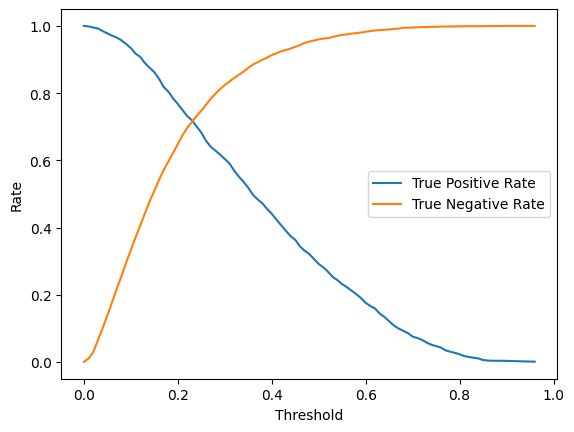

In [109]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for each label
y_probs = frm.predict_proba(x_test)  

# If you have multiple labels, choose one label to analyze
label_index = 0  # Choose the first label
y_probs_label = y_probs[label_index][:, 1]  # Get probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test.iloc[:, label_index], y_probs_label)

# Plot ROC Curve
plt.plot(thresholds, tpr, label='True Positive Rate')
plt.plot(thresholds, 1 - fpr, label='True Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend()
plt.show()

## Gradiant Boosting Algorithm

* Gradient Boosting (GB) is an ensemble learning technique that builds models sequentially, where each new model corrects the errors of the previous ones to improve overall accuracy. Unlike Random Forest, which uses Bagging to train multiple trees independently, Gradient Boosting relies on Boosting, where weak learners (usually Decision Trees) are trained in sequence. The key idea is to minimize the loss function by adjusting the model’s predictions through gradient descent. At each step, a new tree is added to predict the residual errors of the previous model, and their outputs are combined to make a final prediction. Popular implementations of Gradient Boosting include XGBoost, LightGBM, and CatBoost, which are optimized for speed and efficiency. GB is widely used in machine learning competitions and real-world applications like credit scoring, fraud detection, and recommendation systems due to its high predictive accuracy. However, it can be prone to overfitting and requires careful tuning of hyperparameters like learning rate, number of trees, and tree depth to achieve the best performance.

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
fgb = MultiOutputClassifier(gb)
fgb.fit(x_train,y_train)

MultiOutputClassifier(estimator=GradientBoostingClassifier())

In [111]:
y_gb = fgb.predict(x_test)

In [112]:
a5 = accuracy_score(y_test,y_gb)
a5

0.6550846188407967

In [113]:
y_tgb = fgb.predict(x_train)

In [114]:
t5 = accuracy_score(y_train,y_tgb)
t5

0.6571143285072392

In [115]:
print(classification_report(y_test,y_gb))

              precision    recall  f1-score   support

           0       0.67      0.32      0.44      1447
           1       0.77      0.75      0.76      3092

   micro avg       0.76      0.61      0.68      4539
   macro avg       0.72      0.54      0.60      4539
weighted avg       0.74      0.61      0.66      4539
 samples avg       0.34      0.31      0.32      4539



### Gradiant Boosting Hyperparamter Tuning :-
* Hyperparameter tuning is the process of optimizing the settings of a machine learning model to improve its performance. Hyperparameters are external configurations that control how a model learns but are not learned from the training data, such as learning rate, number of trees in a Random Forest, or the number of hidden layers in a neural network. Tuning these parameters is crucial because choosing the right values can significantly impact the model's accuracy, speed, and ability to generalize to new data. Common techniques for hyperparameter tuning include Grid Search, which systematically tests all possible combinations of parameters; Random Search, which randomly selects parameter combinations within a defined range; and advanced methods like Bayesian Optimization and Genetic Algorithms, which intelligently search for the best parameters based on previous results. Proper hyperparameter tuning helps prevent overfitting, improves model efficiency, and ensures the best possible performance on unseen data, making it an essential step in the machine learning workflow.

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier

# Define the model
gb_model = GradientBoostingClassifier()
final_gb_model = MultiOutputClassifier(gb_model)

# Define the hyperparameters grid (use 'estimator__' prefix)
param_grid = {
    'estimator__n_estimators': [50, 100, 200], 
    'estimator__max_depth': [3, 5, 7],  
    'estimator__subsample': [0.7, 0.8, 1.0],  
    'estimator__min_samples_split': [2, 5, 10],  
    'estimator__min_samples_leaf': [1, 2, 4]  
}

# Perform Grid Searcha
grid_search = GridSearchCV(final_gb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=MultiOutputClassifier(estimator=GradientBoostingClassifier()),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [3, 5, 7],
                         'estimator__min_samples_leaf': [1, 2, 4],
                         'estimator__min_samples_split': [2, 5, 10],
                         'estimator__n_estimators': [50, 100, 200],
                         'estimator__subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [111]:
y_hgb = grid_search.predict(x_test)

In [112]:
accuracy_score(y_test,y_hgb)

0.6543357795417103

In [113]:
y_thgb = grid_search.predict(x_train)

In [114]:
accuracy_score(y_train,y_thgb)

0.6763354967548677

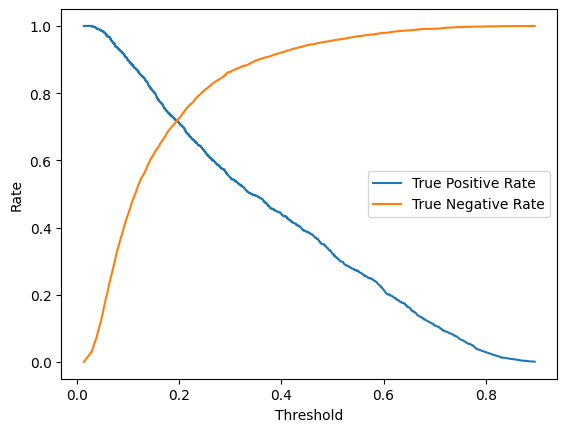

In [116]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for each label
y_probs = fgb.predict_proba(x_test)  

# If you have multiple labels, choose one label to analyze
label_index = 0  # Choose the first label
y_probs_label = y_probs[label_index][:, 1]  # Get probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test.iloc[:, label_index], y_probs_label)

# Plot ROC Curve
plt.plot(thresholds, tpr, label='True Positive Rate')
plt.plot(thresholds, 1 - fpr, label='True Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend()
plt.show()

## XGBoost Algorithm

* XGBoost (Extreme Gradient Boosting) is a powerful and optimized machine learning algorithm based on the Gradient Boosting framework. It is designed to improve both speed and performance by using advanced techniques such as parallel processing, tree pruning, and regularization. Unlike traditional Gradient Boosting, XGBoost implements a more efficient way of handling missing values, reducing overfitting through L1 (Lasso) and L2 (Ridge) regularization, and using histogram-based learning for faster computation. It works by sequentially building decision trees, where each new tree corrects the errors of the previous ones by minimizing a loss function using gradient descent. XGBoost is widely used in machine learning competitions and real-world applications such as fraud detection, recommendation systems, and healthcare predictions due to its high accuracy and efficiency. However, tuning hyperparameters like learning rate, number of trees, and max depth is essential to achieve optimal performance.

In [117]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
fxgb = MultiOutputClassifier(xgb)
fxgb.fit(x_train,y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [118]:
y_xgb = fxgb.predict(x_test)

In [119]:
a6 = accuracy_score(y_test,y_xgb)
a6

0.6428036543357796

In [120]:
y_txgb = fxgb.predict(x_train)

In [121]:
t6 = accuracy_score(y_train,y_txgb)
t6

0.8112830753869196

In [122]:
print(classification_report(y_test,y_xgb))

              precision    recall  f1-score   support

           0       0.61      0.36      0.45      1447
           1       0.76      0.74      0.75      3092

   micro avg       0.72      0.62      0.67      4539
   macro avg       0.68      0.55      0.60      4539
weighted avg       0.71      0.62      0.66      4539
 samples avg       0.34      0.32      0.32      4539



In [145]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier

# Define the model
gb_model1 = XGBClassifier()
final_gb_model1 = MultiOutputClassifier(gb_model1)

param_grid = {
    "estimator__n_estimators": [200, 300, 500],   # More boosting rounds
    "estimator__learning_rate": [0.05, 0.1, 0.15], # Adjusted learning rates
    "estimator__max_depth": [4, 6, 8],           # Moderate tree depth
    "estimator__subsample": [0.8, 0.9, 1.0],     # Use more data per tree
    "estimator__colsample_bytree": [0.8, 1.0],   # Use more features per tree
    "estimator__gamma": [0, 0.1, 0.2],           # Regularization to reduce overfitting
    "estimator__reg_lambda": [1, 1.5, 2]         # L2 Regularization
}


# Perform Grid Searcha
grid_search = GridSearchCV(final_gb_model1, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


GridSearchCV(cv=5,
             estimator=MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                                     booster=None,
                                                                     callbacks=None,
                                                                     colsample_bylevel=None,
                                                                     colsample_bynode=None,
                                                                     colsample_bytree=None,
                                                                     device=None,
                                                                     early_stopping_rounds=None,
                                                                     enable_categorical=False,
                                                                     eval_metric=None,
                                                                     feature_types=None,
                                                                     gamma=None,
                                                                     grow_policy=None,
                                                                     importance_type=None,
                                                                     interaction_cons...
                                                                     num_parallel_tree=None,
                                                                     random_state=None, ...)),
             n_jobs=-1,
             param_grid={'estimator__colsample_bytree': [0.8, 1.0],
                         'estimator__gamma': [0, 0.1, 0.2],
                         'estimator__learning_rate': [0.05, 0.1, 0.15],
                         'estimator__max_depth': [4, 6, 8],
                         'estimator__n_estimators': [200, 300, 500],
                         'estimator__reg_lambda': [1, 1.5, 2],
                         'estimator__subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

In [146]:
y_hxgb = grid_search.predict(x_test)

In [151]:
a8 = accuracy_score(y_test,y_hxgb)
a8

0.6592781189156807

In [148]:
y_thxgb = grid_search.predict(x_train)

In [152]:
t8 = accuracy_score(y_train,y_thxgb)
t8

0.6786320519221168

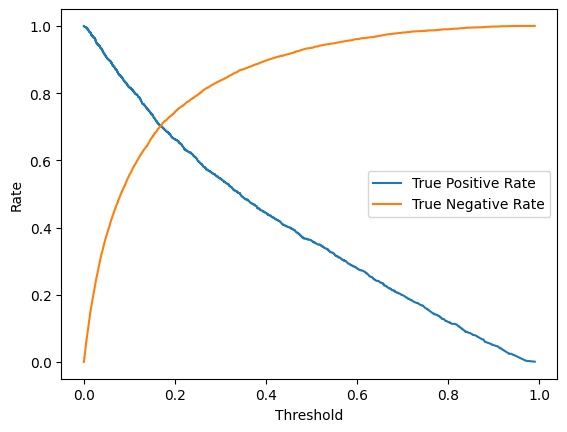

In [123]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for each label
y_probs = fxgb.predict_proba(x_test)  

# If you have multiple labels, choose one label to analyze
label_index = 0  # Choose the first label
y_probs_label = y_probs[label_index][:, 1]  # Get probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test.iloc[:, label_index], y_probs_label)

# Plot ROC Curve
plt.plot(thresholds, tpr, label='True Positive Rate')
plt.plot(thresholds, 1 - fpr, label='True Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend()
plt.show()

## ANN:- Artficial Neural Network Algorithm

* Artificial Neural Network (ANN) is a computational model inspired by the human brain, designed to recognize patterns and make predictions by learning from data. It consists of multiple layers of interconnected nodes (neurons), where each neuron processes input data using mathematical functions and passes the output to the next layer. ANN typically has three main layers: the input layer, which receives raw data; hidden layers, which perform complex computations and extract features; and the output layer, which generates the final prediction. Each connection between neurons has a weight, and during training, these weights are adjusted using optimization algorithms like Gradient Descent to minimize prediction errors. Activation functions such as ReLU, Sigmoid, and Tanh help introduce non-linearity, enabling ANNs to model complex relationships. ANNs are widely used in deep learning applications like image recognition, natural language processing, and autonomous systems. However, they require large amounts of data and computational power for effective training, and careful tuning of hyperparameters like learning rate, number of neurons, and epochs is necessary for optimal performance.

In [124]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()
fann = MultiOutputClassifier(ann)
fann.fit(x_train,y_train)

MultiOutputClassifier(estimator=MLPClassifier())

In [125]:
y_ann = fann.predict(x_test)

In [126]:
a7 = accuracy_score(y_test,y_ann)
a7

0.6450501722330388

In [127]:
y_tann = fann.predict(x_train)

In [128]:
t7 = accuracy_score(y_train,y_tann)
t7

0.6682975536694957

In [129]:
print(classification_report(y_test,y_ann))

              precision    recall  f1-score   support

           0       0.58      0.42      0.49      1447
           1       0.79      0.68      0.73      3092

   micro avg       0.73      0.60      0.66      4539
   macro avg       0.69      0.55      0.61      4539
weighted avg       0.72      0.60      0.65      4539
 samples avg       0.31      0.30      0.30      4539



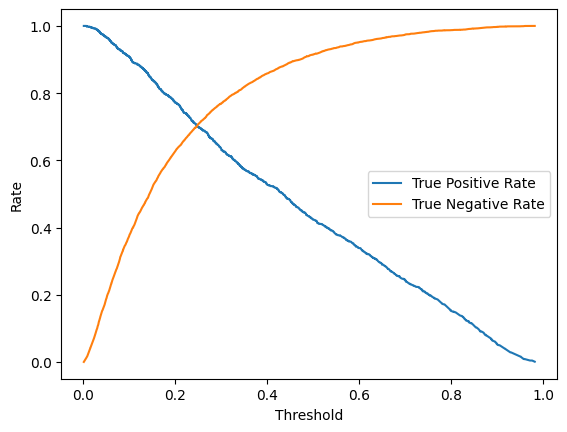

In [130]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for each label
y_probs = fann.predict_proba(x_test)  

# If you have multiple labels, choose one label to analyze
label_index = 0  # Choose the first label
y_probs_label = y_probs[label_index][:, 1]  # Get probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test.iloc[:, label_index], y_probs_label)

# Plot ROC Curve
plt.plot(thresholds, tpr, label='True Positive Rate')
plt.plot(thresholds, 1 - fpr, label='True Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend()
plt.show()

## Model Comparison Report

In [153]:
# check the all algorithm model perforamnce in table form
# check the Model name, r2_score, mean_squer_error, mean_absolute_error
score = pd.DataFrame({"Model":["LogisticRegression","DecisionTreeClassification","Bagging Algorithm","RandomForestClassification","GradiantBoosting Algorithm","XGBClassification","ANN_MLPClassification"],
                     "Accuracy_Score":[a1*100,a2*100,a3*100,a4*100,a5*100,a8*100,a7*100],
                      "Trainig_Accuracy_Score":[t1*100,t2*100,t3*100,t4*100,t5*100,t8*100,t7*100]})
score

Model  Accuracy_Score  Trainig_Accuracy_Score
0          LogisticRegression       64.070690               64.423365
1  DecisionTreeClassification       49.318556              100.000000
2           Bagging Algorithm       60.985473               96.560160
3  RandomForestClassification       64.385203               99.995007
4  GradiantBoosting Algorithm       65.508462               65.711433
5           XGBClassification       65.927812               67.863205
6       ANN_MLPClassification       64.505017               66.829755

<Figure size 1200x600 with 0 Axes>

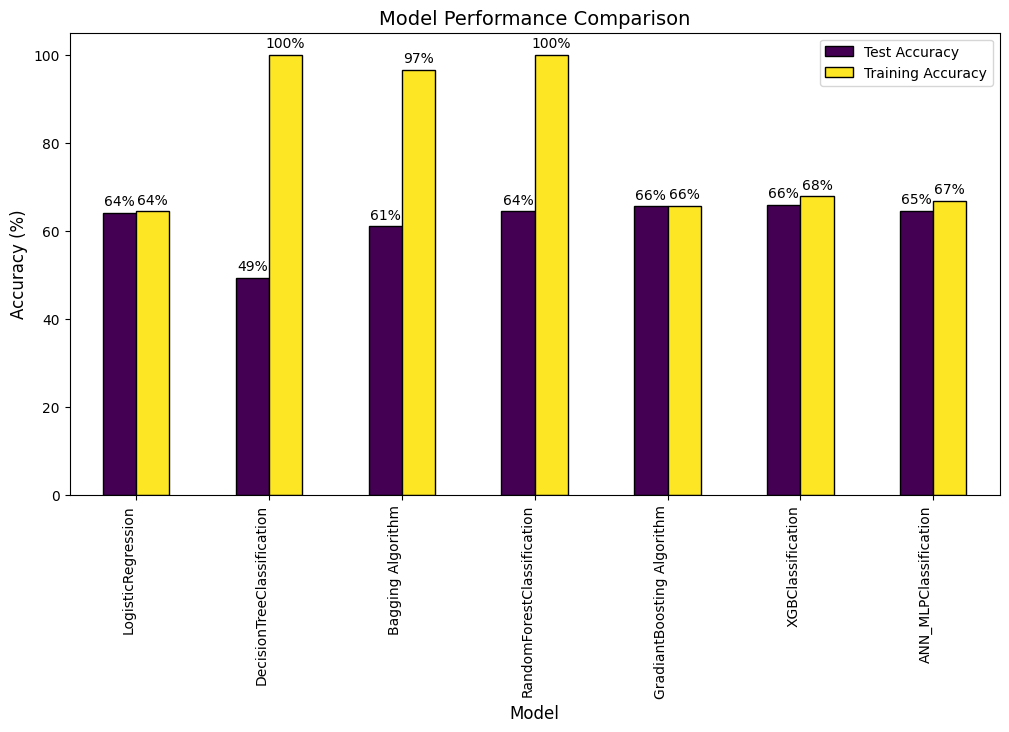

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame
score = pd.DataFrame({
    "Model": [
        "LogisticRegression", "DecisionTreeClassification", "Bagging Algorithm",
        "RandomForestClassification", "GradiantBoosting Algorithm", "XGBClassification", "ANN_MLPClassification"
    ],
    "Accuracy_Score": [a1*100, a2*100, a3*100, a4*100, a5*100, a8*100, a7*100],
    "Trainig_Accuracy_Score": [t1*100, t2*100, t3*100, t4*100, t5*100, t8*100, t7*100]
})

# Set figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
ax = score.plot(x="Model", kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")

# Customize the plot
plt.title("Model Performance Comparison", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels for better visibility
plt.legend(["Test Accuracy", "Training Accuracy"], fontsize=10)

# Display values on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.f%%", fontsize=10, padding=3)

# Show plot
plt.show()

### Final Summary:
* Gradient Boosting Algorithm is the best choice as it achieves the highest accuracy (65.51%) with minimal overfitting.

* Logistic Regression and ANN are also good stable models with comparable performance.

* Decision Tree and Random Forest need regularization or pruning to reduce overfitting.

## Challenges Faced During the Project

**1. Predicting Two Columns Simultaneously**

* Implementing a multi-output classification model to predict both H1N1 and seasonal flu vaccines at the same time.

**2. Exploratory Data Analysis (EDA)**

* Understanding data distribution, relationships, and patterns for both target variables.
* Handling categorical and numerical data efficiently.

**3. Outliers**

* Identifying and handling outliers that could impact model performance.
* Choosing whether to remove, transform, or cap extreme values.

**4. Null Values**

* Managing missing data using imputation techniques like mean, median, mode, or predictive methods.
* Ensuring that missing values do not introduce bias in predictions.

**5. Feature Selection**

* Identifying relevant features while removing less important ones.
* Using techniques like correlation analysis, mutual information, or recursive feature elimination (RFE).

**6. Overfitting Problem**

* The model performs well on training data but generalizes poorly on test data.
* Applied techniques like regularization, pruning, dropout (for deep learning), and hyperparameter tuning.

**7. Difficulty in Increasing Accuracy**

* Accuracy remains below 70%, despite using hyperparameter tuning, feature engineering, and different models.
* Exploring ensemble methods (Bagging, Boosting), advanced feature engineering, and alternative models.

## Model Save

* Saving a machine learning model using a .pkl (Pickle) file allows you to store and reuse the trained model without retraining it each time, making it ideal for deployment and sharing. This approach is widely used because it enables fast serialization and deserialization, ensuring quick loading and prediction. The process involves training a model, such as a RandomForestClassifier, and then using pickle.dump() to save it as a .pkl file. Later, the saved model can be reloaded using pickle.load() and used for predictions on new data. Alternatively, for larger models like XGBoost or RandomForest, joblib is preferred as it provides better efficiency and supports compression. This method is highly beneficial in real-world applications such as deploying models in Streamlit, Flask, or FastAPI, where rapid inference without retraining is required. If you need guidance on deploying your .pkl model, I can help you set it up. 

In [133]:
import pickle
with open("Vaccine_H1N1.pkl","wb") as f:
    pickle.dump(fgb,f)

In [134]:
with open("Vaccine_H1N1.pkl","rb") as f:
    file = pickle.load(f)

In [135]:
file

MultiOutputClassifier(estimator=GradientBoostingClassifier())

In [136]:
x_train

h1n1_concern  h1n1_knowledge  behavioral_avoidance  \
380             3.0             1.0              0.000000   
3665            2.0             0.0              0.000000   
13656           2.0             0.0              1.000000   
17931           3.0             2.0              1.000000   
25426           0.0             0.0              0.000000   
...             ...             ...                   ...   
13123           1.0             1.0              1.000000   
19648           1.0             1.0              0.000000   
9845            2.0             1.0              0.000000   
10799           2.0             2.0              0.725612   
2732            3.0             2.0              0.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
380                            0.0                      0.0   
3665                           0.0                      0.0   
13656                          1.0                      1.0   
17931                          1.0                      0.0   
25426                          0.0                      0.0   
...                            ...                      ...   
13123                          1.0                      1.0   
19648                          0.0                      0.0   
9845                           0.0                      0.0   
10799                          0.0                      0.0   
2732                           0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
380                      0.0          0.000000              0.000000   
3665                     0.0          0.000000              0.000000   
13656                    0.0          0.000000              1.000000   
17931                    0.0          0.220312              0.329735   
25426                    0.0          0.220312              0.329735   
...                      ...               ...                   ...   
13123                    1.0          0.000000              0.000000   
19648                    1.0          0.220312              0.329735   
9845                     0.0          0.000000              1.000000   
10799                    1.0          0.000000              1.000000   
2732                     1.0          0.000000              1.000000   

       chronic_med_condition  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
380                      1.0                          2.0                1.0   
3665                     0.0                          3.0                3.0   
13656                    1.0                          5.0                4.0   
17931                    0.0                          3.0                2.0   
25426                    0.0                          3.0                1.0   
...                      ...                          ...                ...   
13123                    0.0                          3.0                1.0   
19648                    1.0                          5.0                1.0   
9845                     0.0                          5.0                2.0   
10799                    1.0                          4.0                4.0   
2732                     0.0                          5.0                5.0   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
380                            4.0                          4.0   
3665                           2.0                          3.0   
13656                          4.0                          4.0   
17931                          4.0                          4.0   
25426                          1.0                          3.0   
...                            ...                          ...   
13123                          1.0                          4.0   
19648                          2.0                          5.0   
9845                           2.0                          4.0   
10799                

In [137]:
y_train

h1n1_vaccine  seasonal_vaccine
380               0                 0
3665              0                 1
13656             1                 1
17931             0                 0
25426             0                 0
...             ...               ...
13123             0                 0
19648             0                 1
9845              1                 1
10799             0                 1
2732              0                 1

[20030 rows x 2 columns]

In [138]:
file.predict([[3.0,	1.0,	0.000000,	0.0,	0.0,	0.0,	0.000000,	0.000000,	1.0,	2.0,	1.0,	4.0,	4.0,	4.0,	2.0,	49,	2.0,	3,	2,	0,	1.0,	1.0,	1,	0,	1,	0,	0,	1,	0,	1	,0	,1,	0	,0]])

array([[0, 0]], dtype=int64)

<div style="text-align: center;">
    <b style="font-size: 30px;">Thank you</b>
</div>
